In [254]:
import numpy as np
import pandas as pd
from numpy.linalg import eig
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# **Question 1**

## **Part 1**

In [255]:
train=pd.read_csv('train.data')
test=pd.read_csv('test.test')

In [256]:
train

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


In [257]:
columns=[
    'family', 'product-type', 'steel', 'carbon', 'hardness', 'temper_rolling',
    'condition', 'formability', 'strength', 'non-ageing', 'surface-finish',
    'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm',
    'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr',
    'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape',
    'thick', 'width', 'len', 'oil', 'bore', 'packing','classes'
]

In [258]:
train.columns=columns
test.columns=columns

In [259]:
train

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


### We check for columns having more than 75% of the data as NaN ie. ?
### Once we obtain those columns we can safely drop them

In [260]:
def drop_nan_columns(column_name):
    nan_count=0
    for i in range(len(train[column_name])):
        if(train[column_name][i]=='?'):
            nan_count=nan_count+1
    if(nan_count/len(train[column_name])>=0.75):
        del train[column_name]
        del test[column_name]

In [261]:
for i in train.columns:
    drop_nan_columns(i)

In [262]:
print(train)

    product-type steel  carbon  hardness condition formability  strength  \
0              C     A       8         0         S           ?         0   
1              C     R       0         0         S           2         0   
2              C     R       0         0         S           2         0   
3              C     A       0        60         ?           ?         0   
4              C     A       0        60         ?           ?         0   
..           ...   ...     ...       ...       ...         ...       ...   
793            C     A       0        50         ?           ?         0   
794            C     ?       0         0         S           1         0   
795            C     A       0         0         S           2         0   
796            C     A       0         0         S           2         0   
797            C     R       0         0         S           2         0   

    surface-quality  shape  thick   width   len  bore classes  
0                 G   C

In [263]:
for i in train.columns:
    print(i)
    print()
    print(dict(Counter((train[i]))))
    print()

product-type

{'C': 798}

steel

{'A': 397, 'R': 231, 'K': 44, 'S': 9, '?': 70, 'W': 17, 'M': 17, 'V': 13}

carbon

{8: 2, 0: 730, 10: 2, 55: 17, 70: 4, 3: 1, 4: 4, 45: 13, 6: 11, 65: 14}

hardness

{0: 640, 60: 23, 45: 53, 80: 4, 70: 17, 85: 30, 50: 31}

condition

{'S': 495, '?': 271, 'A': 32}

formability

{'?': 283, '2': 338, '3': 128, '1': 40, '5': 9}

strength

{0: 741, 310: 17, 350: 7, 500: 16, 600: 10, 400: 4, 300: 2, 700: 1}

surface-quality

{'G': 200, 'E': 278, 'D': 50, 'F': 53, '?': 217}

shape

{'COIL': 367, 'SHEET': 431}

thick

{0.7: 82, 3.2: 48, 2.801: 4, 0.801: 7, 1.6: 75, 0.699: 76, 3.3: 1, 1.0: 29, 1.2: 35, 0.3: 41, 0.6: 79, 4.0: 12, 3.201: 9, 0.8: 64, 0.501: 1, 1.001: 5, 0.5: 15, 1.4: 2, 0.75: 2, 1.399: 2, 0.651: 1, 0.799: 11, 0.601: 18, 2.5: 13, 1.599: 29, 0.599: 5, 0.301: 10, 0.4: 31, 3.5: 3, 2.0: 17, 1.201: 9, 1.5: 6, 0.999: 4, 0.25: 1, 0.451: 3, 1.09: 5, 1.1: 2, 1.601: 9, 0.9: 8, 0.901: 2, 2.3: 7, 1.3: 2, 1.9: 1, 0.321: 3, 1.299: 2, 2.2: 3, 2.8: 1, 2.501: 2, 3.0

### We replace the nan values with the maximum frequency element

In [264]:
nan_columns_max=[('steel','A'),('condition','S'),('formability','2'),('surface-quality','E')] #stores max frequency elements corresponding to the column having nan value
for i in range(len(nan_columns_max)):
    column_name=nan_columns_max[i][0]
    for j in range(len(train[column_name])):
        if(train[column_name][j]=='?'):
            train[column_name][j]=nan_columns_max[i][1]

<ipython-input-264-306c8c3bd693>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[column_name][j]=nan_columns_max[i][1]


In [265]:
for i in train.columns:
    print(i)
    print()
    print(dict(Counter((train[i]))))
    print()

product-type

{'C': 798}

steel

{'A': 467, 'R': 231, 'K': 44, 'S': 9, 'W': 17, 'M': 17, 'V': 13}

carbon

{8: 2, 0: 730, 10: 2, 55: 17, 70: 4, 3: 1, 4: 4, 45: 13, 6: 11, 65: 14}

hardness

{0: 640, 60: 23, 45: 53, 80: 4, 70: 17, 85: 30, 50: 31}

condition

{'S': 766, 'A': 32}

formability

{'2': 621, '3': 128, '1': 40, '5': 9}

strength

{0: 741, 310: 17, 350: 7, 500: 16, 600: 10, 400: 4, 300: 2, 700: 1}

surface-quality

{'G': 200, 'E': 495, 'D': 50, 'F': 53}

shape

{'COIL': 367, 'SHEET': 431}

thick

{0.7: 82, 3.2: 48, 2.801: 4, 0.801: 7, 1.6: 75, 0.699: 76, 3.3: 1, 1.0: 29, 1.2: 35, 0.3: 41, 0.6: 79, 4.0: 12, 3.201: 9, 0.8: 64, 0.501: 1, 1.001: 5, 0.5: 15, 1.4: 2, 0.75: 2, 1.399: 2, 0.651: 1, 0.799: 11, 0.601: 18, 2.5: 13, 1.599: 29, 0.599: 5, 0.301: 10, 0.4: 31, 3.5: 3, 2.0: 17, 1.201: 9, 1.5: 6, 0.999: 4, 0.25: 1, 0.451: 3, 1.09: 5, 1.1: 2, 1.601: 9, 0.9: 8, 0.901: 2, 2.3: 7, 1.3: 2, 1.9: 1, 0.321: 3, 1.299: 2, 2.2: 3, 2.8: 1, 2.501: 2, 3.0: 1}

width

{610.0: 251, 1300.0: 28, 3

### so we eliminated all the NaN values

### **Exploratory Analysis**

In [266]:
#we plot pie charts for categorical features and histogram for numerical
def plot_pie(column_name):
    column_value=list(train[column_name])
    counter=dict(Counter(column_value))
    values=counter.values()
    keys=counter.keys()
    plt.pie(values,labels=keys)
    plt.show()

In [267]:
def plot_histogram(column_name):
    hist_list=[]
    for classes in set(train['classes']):
        class_df=train[train['classes']==classes]
        hist_list.append(list(class_df[column_name]))
    plt.hist(hist_list,label=['Class'+str(i) for i in set(train['classes'])])
    plt.legend()
    plt.show()

product-type


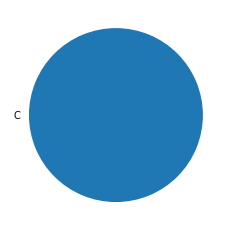

steel


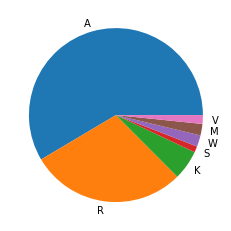

carbon


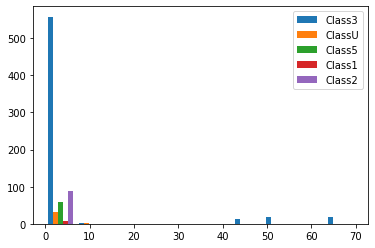

hardness


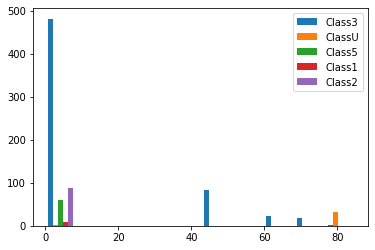

condition


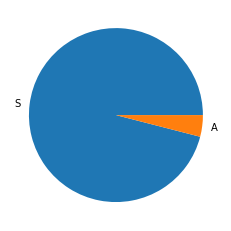

formability


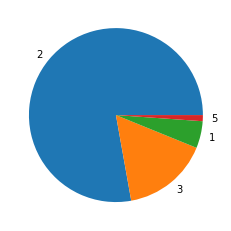

strength


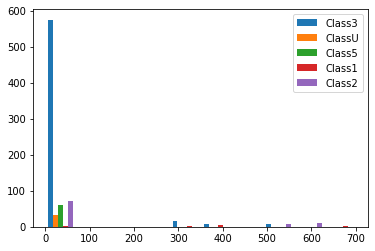

surface-quality


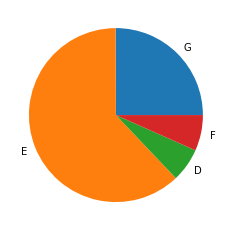

shape


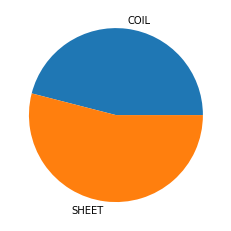

thick


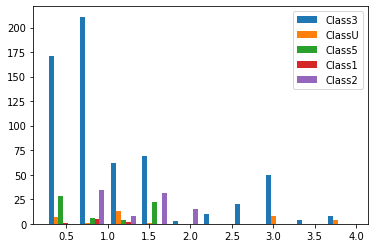

width


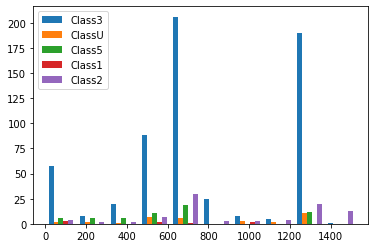

len


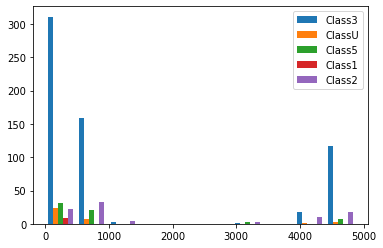

bore


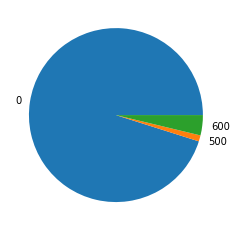

classes


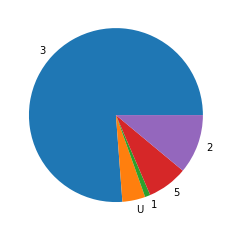

In [268]:
numerical_features=['carbon','hardness','strength','thick','width','len']
for i in train.columns:
    print(i)
    if(i in numerical_features):
        plot_histogram(i)
    else:
        plot_pie(i)

## **Part 2**

### To analyze error we see the Counter for each columns

In [269]:
for i in train.columns:
    print(i)
    print()
    print(dict(Counter((train[i]))))
    print()

product-type

{'C': 798}

steel

{'A': 467, 'R': 231, 'K': 44, 'S': 9, 'W': 17, 'M': 17, 'V': 13}

carbon

{8: 2, 0: 730, 10: 2, 55: 17, 70: 4, 3: 1, 4: 4, 45: 13, 6: 11, 65: 14}

hardness

{0: 640, 60: 23, 45: 53, 80: 4, 70: 17, 85: 30, 50: 31}

condition

{'S': 766, 'A': 32}

formability

{'2': 621, '3': 128, '1': 40, '5': 9}

strength

{0: 741, 310: 17, 350: 7, 500: 16, 600: 10, 400: 4, 300: 2, 700: 1}

surface-quality

{'G': 200, 'E': 495, 'D': 50, 'F': 53}

shape

{'COIL': 367, 'SHEET': 431}

thick

{0.7: 82, 3.2: 48, 2.801: 4, 0.801: 7, 1.6: 75, 0.699: 76, 3.3: 1, 1.0: 29, 1.2: 35, 0.3: 41, 0.6: 79, 4.0: 12, 3.201: 9, 0.8: 64, 0.501: 1, 1.001: 5, 0.5: 15, 1.4: 2, 0.75: 2, 1.399: 2, 0.651: 1, 0.799: 11, 0.601: 18, 2.5: 13, 1.599: 29, 0.599: 5, 0.301: 10, 0.4: 31, 3.5: 3, 2.0: 17, 1.201: 9, 1.5: 6, 0.999: 4, 0.25: 1, 0.451: 3, 1.09: 5, 1.1: 2, 1.601: 9, 0.9: 8, 0.901: 2, 2.3: 7, 1.3: 2, 1.9: 1, 0.321: 3, 1.299: 2, 2.2: 3, 2.8: 1, 2.501: 2, 3.0: 1}

width

{610.0: 251, 1300.0: 28, 3

### So we observe that only the classes column have error in it we need to change U with 4

In [270]:
for i in range(len(train)):
    if(train['classes'][i]=='U'):
        train['classes'][i]='4'
print(dict(Counter(train['classes'])))

{'3': 608, '4': 34, '1': 8, '5': 60, '2': 88}


<ipython-input-270-e574a06b8cf0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['classes'][i]='4'


### we now need to encode the categorical features to integers

In [271]:
label_encoder=LabelEncoder()
for i in train.columns:
    if i not in numerical_features:
        train[i]=label_encoder.fit_transform(train[i])

In [272]:
print(train)

     product-type  steel  carbon  hardness  condition  formability  strength  \
0               0      0       8         0          1            1         0   
1               0      3       0         0          1            1         0   
2               0      3       0         0          1            1         0   
3               0      0       0        60          1            1         0   
4               0      0       0        60          1            1         0   
..            ...    ...     ...       ...        ...          ...       ...   
793             0      0       0        50          1            1         0   
794             0      0       0         0          1            0         0   
795             0      0       0         0          1            1         0   
796             0      0       0         0          1            1         0   
797             0      3       0         0          1            1         0   

     surface-quality  shape  thick   wi

In [273]:
for i in train.columns:
    print(i)
    print()
    print(dict(Counter((train[i]))))
    print()

product-type

{0: 798}

steel

{0: 467, 3: 231, 1: 44, 4: 9, 6: 17, 2: 17, 5: 13}

carbon

{8: 2, 0: 730, 10: 2, 55: 17, 70: 4, 3: 1, 4: 4, 45: 13, 6: 11, 65: 14}

hardness

{0: 640, 60: 23, 45: 53, 80: 4, 70: 17, 85: 30, 50: 31}

condition

{1: 766, 0: 32}

formability

{1: 621, 2: 128, 0: 40, 3: 9}

strength

{0: 741, 310: 17, 350: 7, 500: 16, 600: 10, 400: 4, 300: 2, 700: 1}

surface-quality

{3: 200, 1: 495, 0: 50, 2: 53}

shape

{0: 367, 1: 431}

thick

{0.7: 82, 3.2: 48, 2.801: 4, 0.801: 7, 1.6: 75, 0.699: 76, 3.3: 1, 1.0: 29, 1.2: 35, 0.3: 41, 0.6: 79, 4.0: 12, 3.201: 9, 0.8: 64, 0.501: 1, 1.001: 5, 0.5: 15, 1.4: 2, 0.75: 2, 1.399: 2, 0.651: 1, 0.799: 11, 0.601: 18, 2.5: 13, 1.599: 29, 0.599: 5, 0.301: 10, 0.4: 31, 3.5: 3, 2.0: 17, 1.201: 9, 1.5: 6, 0.999: 4, 0.25: 1, 0.451: 3, 1.09: 5, 1.1: 2, 1.601: 9, 0.9: 8, 0.901: 2, 2.3: 7, 1.3: 2, 1.9: 1, 0.321: 3, 1.299: 2, 2.2: 3, 2.8: 1, 2.501: 2, 3.0: 1}

width

{610.0: 251, 1300.0: 28, 385.1: 4, 255.0: 2, 152.0: 2, 1320.0: 135, 609.9

In [274]:
train.drop(['product-type'],axis=1,inplace=True)

### Non standardized data:

In [275]:
non_standardized_data=train.copy()
print(non_standardized_data)

     steel  carbon  hardness  condition  formability  strength  \
0        0       8         0          1            1         0   
1        3       0         0          1            1         0   
2        3       0         0          1            1         0   
3        0       0        60          1            1         0   
4        0       0        60          1            1         0   
..     ...     ...       ...        ...          ...       ...   
793      0       0        50          1            1         0   
794      0       0         0          1            0         0   
795      0       0         0          1            1         0   
796      0       0         0          1            1         0   
797      3       0         0          1            1         0   

     surface-quality  shape  thick   width   len  bore  classes  
0                  3      0  0.700   610.0     0     0        2  
1                  1      0  3.200   610.0     0     0        2  
2        

In [276]:
x_train_non_standardized,x_test_non_standardized,y_train_non_standardized,y_test_non_standardized=train_test_split(non_standardized_data.iloc[:,:-1],non_standardized_data.iloc[:,-1],train_size=0.65,random_state=2)

In [277]:
scaler=StandardScaler()
scaler.fit(train[numerical_features])
train[numerical_features]=scaler.transform(train[numerical_features])

### Standardized Data

In [278]:
standardized_data=train.copy()
print(standardized_data)

     steel    carbon  hardness  condition  formability  strength  \
0        0  0.327764 -0.477458          1            1 -0.267167   
1        3 -0.261159 -0.477458          1            1 -0.267167   
2        3 -0.261159 -0.477458          1            1 -0.267167   
3        0 -0.261159  1.961015          1            1 -0.267167   
4        0 -0.261159  1.961015          1            1 -0.267167   
..     ...       ...       ...        ...          ...       ...   
793      0 -0.261159  1.554602          1            1 -0.267167   
794      0 -0.261159 -0.477458          1            0 -0.267167   
795      0 -0.261159 -0.477458          1            1 -0.267167   
796      0 -0.261159 -0.477458          1            1 -0.267167   
797      3 -0.261159 -0.477458          1            1 -0.267167   

     surface-quality  shape     thick     width       len  bore  classes  
0                  3      0 -0.559593 -0.424617 -0.675142     0        2  
1                  1      0  2.34

In [279]:
x_train_standardized,x_test_standardized,y_train_standardized,y_test_standardized=train_test_split(standardized_data.iloc[:,:-1],standardized_data.iloc[:,-1],train_size=0.65,random_state=2)

### Now we preprocess the testing data as well

In [280]:
for i in test.columns:
    print(i)
    print()
    print(dict(Counter((test[i]))))
    print()

product-type

{'C': 100}

steel

{'A': 43, '?': 16, 'R': 25, 'V': 3, 'M': 3, 'K': 7, 'S': 1, 'W': 2}

carbon

{0: 91, 55: 2, 70: 1, 65: 1, 45: 4, 8: 1}

hardness

{45: 5, 0: 81, 85: 5, 50: 3, 60: 3, 70: 2, 80: 1}

condition

{'S': 60, '?': 32, 'A': 8}

formability

{'?': 35, '3': 15, '2': 40, '1': 8, '5': 2}

strength

{0: 93, 500: 2, 350: 2, 310: 2, 600: 1}

surface-quality

{'D': 5, 'E': 32, '?': 27, 'F': 7, 'G': 29}

shape

{'COIL': 45, 'SHEET': 55}

thick

{1.6: 15, 0.699: 11, 0.4: 6, 0.8: 7, 1.2: 4, 0.7: 8, 1.601: 3, 4.0: 2, 0.601: 3, 0.301: 2, 0.6: 4, 0.5: 1, 3.2: 11, 2.5: 1, 2.2: 2, 0.999: 2, 1.001: 1, 0.3: 3, 1.0: 2, 2.0: 1, 0.9: 1, 1.1: 1, 2.801: 1, 1.599: 5, 0.24: 1, 0.451: 1, 1.5: 1}

width

{610.0: 27, 609.9: 13, 1320.0: 20, 50.0: 4, 300.1: 1, 1250.0: 3, 831.9: 1, 385.1: 1, 150.0: 2, 335.0: 2, 60.0: 1, 1220.0: 4, 640.0: 3, 375.0: 3, 900.0: 3, 0.0: 1, 609.0: 1, 1050.0: 1, 1525.0: 1, 599.9: 1, 1300.0: 2, 520.0: 1, 20.0: 2, 1500.0: 1, 830.0: 1}

len

{0: 46, 762: 21, 301: 2, 4

In [281]:
test.drop(['product-type'],axis=1,inplace=True)

### so firstly we remove the NaN values

In [282]:
nan_columns_max=[('steel','A'),('condition','S'),('formability','2'),('surface-quality','E')] #stores max frequency elements corresponding to the column having nan value
for i in range(len(nan_columns_max)):
    column_name=nan_columns_max[i][0]
    for j in range(len(test[column_name])):
        if(test[column_name][j]=='?'):
            test[column_name][j]=nan_columns_max[i][1]

<ipython-input-282-8b79f7dfb99d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[column_name][j]=nan_columns_max[i][1]


In [283]:
for i in test.columns:
    print(i)
    print()
    print(dict(Counter((test[i]))))
    print()

steel

{'A': 59, 'R': 25, 'V': 3, 'M': 3, 'K': 7, 'S': 1, 'W': 2}

carbon

{0: 91, 55: 2, 70: 1, 65: 1, 45: 4, 8: 1}

hardness

{45: 5, 0: 81, 85: 5, 50: 3, 60: 3, 70: 2, 80: 1}

condition

{'S': 92, 'A': 8}

formability

{'2': 75, '3': 15, '1': 8, '5': 2}

strength

{0: 93, 500: 2, 350: 2, 310: 2, 600: 1}

surface-quality

{'D': 5, 'E': 59, 'F': 7, 'G': 29}

shape

{'COIL': 45, 'SHEET': 55}

thick

{1.6: 15, 0.699: 11, 0.4: 6, 0.8: 7, 1.2: 4, 0.7: 8, 1.601: 3, 4.0: 2, 0.601: 3, 0.301: 2, 0.6: 4, 0.5: 1, 3.2: 11, 2.5: 1, 2.2: 2, 0.999: 2, 1.001: 1, 0.3: 3, 1.0: 2, 2.0: 1, 0.9: 1, 1.1: 1, 2.801: 1, 1.599: 5, 0.24: 1, 0.451: 1, 1.5: 1}

width

{610.0: 27, 609.9: 13, 1320.0: 20, 50.0: 4, 300.1: 1, 1250.0: 3, 831.9: 1, 385.1: 1, 150.0: 2, 335.0: 2, 60.0: 1, 1220.0: 4, 640.0: 3, 375.0: 3, 900.0: 3, 0.0: 1, 609.0: 1, 1050.0: 1, 1525.0: 1, 599.9: 1, 1300.0: 2, 520.0: 1, 20.0: 2, 1500.0: 1, 830.0: 1}

len

{0: 46, 762: 21, 301: 2, 4170: 6, 881: 1, 3000: 4, 4880: 12, 612: 4, 761: 1, 1220: 1, 1:

In [284]:
#now we perform label encoding
label_encoder=LabelEncoder()
for i in test.columns:
    if i not in numerical_features:
        test[i]=label_encoder.fit_transform(test[i])

In [285]:
for i in test.columns:
    print(i)
    print()
    print(dict(Counter((test[i]))))
    print()

steel

{0: 59, 3: 25, 5: 3, 2: 3, 1: 7, 4: 1, 6: 2}

carbon

{0: 91, 55: 2, 70: 1, 65: 1, 45: 4, 8: 1}

hardness

{45: 5, 0: 81, 85: 5, 50: 3, 60: 3, 70: 2, 80: 1}

condition

{1: 92, 0: 8}

formability

{1: 75, 2: 15, 0: 8, 3: 2}

strength

{0: 93, 500: 2, 350: 2, 310: 2, 600: 1}

surface-quality

{0: 5, 1: 59, 2: 7, 3: 29}

shape

{0: 45, 1: 55}

thick

{1.6: 15, 0.699: 11, 0.4: 6, 0.8: 7, 1.2: 4, 0.7: 8, 1.601: 3, 4.0: 2, 0.601: 3, 0.301: 2, 0.6: 4, 0.5: 1, 3.2: 11, 2.5: 1, 2.2: 2, 0.999: 2, 1.001: 1, 0.3: 3, 1.0: 2, 2.0: 1, 0.9: 1, 1.1: 1, 2.801: 1, 1.599: 5, 0.24: 1, 0.451: 1, 1.5: 1}

width

{610.0: 27, 609.9: 13, 1320.0: 20, 50.0: 4, 300.1: 1, 1250.0: 3, 831.9: 1, 385.1: 1, 150.0: 2, 335.0: 2, 60.0: 1, 1220.0: 4, 640.0: 3, 375.0: 3, 900.0: 3, 0.0: 1, 609.0: 1, 1050.0: 1, 1525.0: 1, 599.9: 1, 1300.0: 2, 520.0: 1, 20.0: 2, 1500.0: 1, 830.0: 1}

len

{0: 46, 762: 21, 301: 2, 4170: 6, 881: 1, 3000: 4, 4880: 12, 612: 4, 761: 1, 1220: 1, 1: 1, 880: 1}

bore

{0: 95, 2: 3, 1: 2}

class

### Non standardized testing data

In [286]:
non_standardized_testing_data=test.copy()
print(non_standardized_testing_data)

    steel  carbon  hardness  condition  formability  strength  \
0       0       0        45          1            1         0   
1       0       0         0          1            2         0   
2       0       0        85          1            1         0   
3       0       0        50          1            1         0   
4       0       0         0          1            1         0   
..    ...     ...       ...        ...          ...       ...   
95      3       0         0          1            2         0   
96      3       0         0          1            2         0   
97      5       0         0          1            1         0   
98      0       0        85          1            1         0   
99      0       0        85          1            1         0   

    surface-quality  shape  thick   width  len  bore  classes  
0                 0      0  1.600   610.0    0     0        1  
1                 1      0  0.699   609.9    0     0        1  
2                 1      1 

### Standardized test data

In [287]:
scaler=StandardScaler()
scaler.fit(test[numerical_features])
test[numerical_features]=scaler.transform(test[numerical_features])

In [288]:
standardized_testing_data=test.copy()
print(standardized_testing_data)

    steel   carbon  hardness  condition  formability  strength  \
0       0 -0.29555  1.281131          1            1 -0.265242   
1       0 -0.29555 -0.465866          1            2 -0.265242   
2       0 -0.29555  2.834017          1            1 -0.265242   
3       0 -0.29555  1.475242          1            1 -0.265242   
4       0 -0.29555 -0.465866          1            1 -0.265242   
..    ...      ...       ...        ...          ...       ...   
95      3 -0.29555 -0.465866          1            2 -0.265242   
96      3 -0.29555 -0.465866          1            2 -0.265242   
97      5 -0.29555 -0.465866          1            1 -0.265242   
98      0 -0.29555  2.834017          1            1 -0.265242   
99      0 -0.29555  2.834017          1            1 -0.265242   

    surface-quality  shape     thick     width       len  bore  classes  
0                 0      0  0.287244 -0.394823 -0.679519     0        1  
1                 1      0 -0.677840 -0.395067 -0.679519   

## **Part 3**

### For Non standardized data:

In [289]:
svm_model=SVC()
svm_model.fit(x_train_non_standardized,y_train_non_standardized)
cross_validation_score_svm_non_standardized=np.array(cross_val_score(svm_model,x_train_non_standardized,y_train_non_standardized))
print('Cross Validation Score for SVM with non standardized data is',cross_validation_score_svm_non_standardized.mean())

Cross Validation Score for SVM with non standardized data is 0.7606235997012696


In [290]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train_non_standardized,y_train_non_standardized)
cross_validation_score_random_forest_non_standardized=np.array(cross_val_score(random_forest_model,x_train_non_standardized,y_train_non_standardized))
print('Cross Validation Score for Random Forest with non standardized data is',cross_validation_score_random_forest_non_standardized.mean())

Cross Validation Score for Random Forest with non standardized data is 0.9478528752800598


In [291]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train_non_standardized,y_train_non_standardized)
cross_validation_score_KNN_non_standardized=np.array(cross_val_score(KNN_model,x_train_non_standardized,y_train_non_standardized))
print('Cross Validation Score for KNN with non standardized data is',cross_validation_score_KNN_non_standardized.mean())

Cross Validation Score for KNN with non standardized data is 0.7548543689320388


### For Standardized Data

In [292]:
svm_model=SVC()
svm_model.fit(x_train_standardized,y_train_standardized)
cross_validation_score_svm_standardized=np.array(cross_val_score(svm_model,x_train_standardized,y_train_standardized))
print('Cross Validation Score for SVM with standardized data is',cross_validation_score_svm_standardized.mean())

Cross Validation Score for SVM with standardized data is 0.816598207617625


In [293]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train_standardized,y_train_standardized)
cross_validation_score_random_forest_standardized=np.array(cross_val_score(random_forest_model,x_train_standardized,y_train_standardized))
print('Cross Validation Score for Random Forest with standardized data is',cross_validation_score_random_forest_standardized.mean())

Cross Validation Score for Random Forest with standardized data is 0.936277072442121


In [294]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train_standardized,y_train_standardized)
cross_validation_score_KNN_standardized=np.array(cross_val_score(KNN_model,x_train_standardized,y_train_standardized))
print('Cross Validation Score for KNN with standardized data is',cross_validation_score_KNN_standardized.mean())

Cross Validation Score for KNN with standardized data is 0.8474981329350261


### So the average cross validation score with standardization is better for all the 3 models

### Plotting the cross validation scores for each models

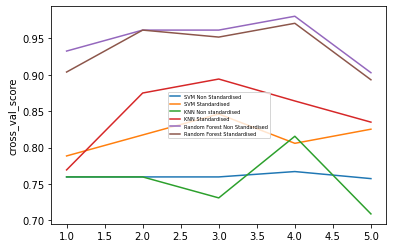

In [295]:
x=np.arange(1,6,1)
plt.plot(x,cross_validation_score_svm_non_standardized,label='SVM Non Standardised')
plt.plot(x,cross_validation_score_svm_standardized,label='SVM Standardised')
plt.plot(x,cross_validation_score_KNN_non_standardized,label='KNN Non standardised')
plt.plot(x,cross_validation_score_KNN_standardized,label='KNN Standardised')
plt.plot(x,cross_validation_score_random_forest_non_standardized,label='Random Forest Non Standardised')
plt.plot(x,cross_validation_score_random_forest_standardized,label='Random Forest Standardised')
plt.ylabel('cross_val_score')
plt.legend(fontsize=5)
plt.show()

## **Part 4:**
Implement Principal Component Analysis from scratch, with sub-tasks as following:-
*   a. Centralize the Data via feature-wise means and standard deviations. Write the code for deriving the covariance matrix from scratch.
*   b. Compute Eigenvectors, Eigenvalues and Principal Components and comment on what is the role of eigenvectors in the report. You may use sklearn to find the eigenvectors but others are to be found from scratch.



In [296]:
from sklearn.decomposition import PCA
class PCA_scratch:
   def __init__(self,dataset,n_components):
     self.df=dataset.copy()
     self.comp=n_components
     self.eigenval=None
     self.eigenvector=None

   def centralize_data(self):
     for i in self.df.columns:
       self.df[i] =(self.df[i] - self.df[i].mean()) / self.df[i].std()

   def cov_mat(self):
     #print(self.df)
     c=len(self.df.axes[1])
     r=len(self.df.axes[0])
     n=r
     matrix=np.zeros((c,c))
     for i in range(c):
       mean_of_i=np.sum(self.df.iloc[:, i])/n
       for j in range(c):
         mean_of_j=np.sum(self.df.iloc[:, j])/n
         matrix[i][j]=np.sum((self.df.iloc[:, i]- mean_of_i)*(self.df.iloc[:, j]- mean_of_j))/(n - 1)
     return matrix

   def eigen(self):
     eigen_val,eigen_vec=eig(self.cov_mat())
     #print(eigen_vec)
     eigen_vec=eigen_vec.transpose()

     return eigen_val,eigen_vec
  
   def principal_comp(self):
     eig_val,eig_vec=self.eigen()
     pairs_eig_val_vec=[]
     length=len(eig_val)
     for i in range(length):
       pairs_eig_val_vec.append([eig_val[i],eig_vec[i]])
     pairs_eig_val_vec=sorted(pairs_eig_val_vec)[::-1]
     princ_comp=[]
     self.eigenval=[]
     for i in range(self.comp):
       princ_comp.append(pairs_eig_val_vec[i][1])
       self.eigenval.append(pairs_eig_val_vec[i][0])
     princ_comp=np.array(princ_comp)
     self.eigenvector=princ_comp
     return princ_comp
     
   def inbuilt(self):
     principal=PCA(n_components=self.comp)
     x=principal.fit_transform(self.df)
     compo=principal.components_
     return compo
   def fit_transform(self):
     principal_comp=self.principal_comp()
     #print(principal_comp)
     for i in self.df.columns:
       self.df[i] =(self.df[i] - self.df[i].mean())
     transformed_df=np.dot(self.df,principal_comp.T)
     return transformed_df

    
  

## **Part 5**
Use the above-made PCA to reduce the data upto a chosen dimension/principal-components.
Plot a bar graph to show the change in variance as you increase the no. of components. Along
with this, plot a scatter plot to show the direction of the eigenvectors along with the data
points(you may choose any 2 features among the reduced dataset).

### Reducing data upto n_components=9

In [297]:
x_train_standardized

,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore
123,0,0.033302,-0.477458,1,1,-0.267167,3,0,-0.211188,0.861020,-0.675142,0
554,0,-0.261159,-0.477458,1,3,-0.267167,1,0,-0.559593,-1.883321,-0.675142,0
180,0,-0.261159,2.977045,1,1,-0.267167,3,0,2.343780,-0.424864,-0.675142,0
161,0,-0.261159,-0.477458,1,1,-0.267167,1,0,2.343780,-0.424864,-0.675142,0
754,0,-0.261159,-0.477458,1,2,-0.267167,1,1,0.021082,-0.424864,1.536373,0
...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,3.051531,-0.477458,1,1,-0.267167,1,0,0.369487,-0.350446,-0.675142,0
584,3,-0.261159,-0.477458,1,1,-0.267167,1,1,-0.560754,-0.427090,-0.350574,0
493,6,-0.261159,-0.477458,1,1,2.417307,3,1,1.531997,1.219515,1.912914,0
527,0,-0.261159,2.977045,1,1,-0.267167,3,0,2.344941,-1.463017,-0.675142,0


In [298]:
x_train_non_standardized

,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore
123,0,4,0,1,1,0,3,0,1.000,1130.0,0,0
554,0,0,0,1,3,0,1,0,0.700,20.0,0,0
180,0,0,85,1,1,0,3,0,3.200,609.9,0,0
161,0,0,0,1,1,0,1,0,3.200,609.9,0,0
754,0,0,0,1,2,0,1,1,1.200,609.9,4170,0
...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,45,0,1,1,0,1,0,1.500,640.0,0,0
584,3,0,0,1,1,0,1,1,0.699,609.0,612,0
493,6,0,0,1,1,310,3,1,2.501,1275.0,4880,0
527,0,0,85,1,1,0,3,0,3.201,190.0,0,0


#### Standardized data

In [299]:
pca_stnd=PCA_scratch(x_train_standardized,9)
x_train_pca_stnd=pca_stnd.fit_transform()
print(x_train_pca_stnd.shape)

(518, 9)


#### Non-Standardized data

In [300]:
pca_non_stnd=PCA_scratch(x_train_non_standardized,9)
x_train_pca_non_stnd=pca_non_stnd.fit_transform()
print(x_train_pca_non_stnd.shape)

(518, 9)


### Bar graph to show the change in variance as you increase the no. of components

In [301]:
x_train_standardized

,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore
123,0,0.033302,-0.477458,1,1,-0.267167,3,0,-0.211188,0.861020,-0.675142,0
554,0,-0.261159,-0.477458,1,3,-0.267167,1,0,-0.559593,-1.883321,-0.675142,0
180,0,-0.261159,2.977045,1,1,-0.267167,3,0,2.343780,-0.424864,-0.675142,0
161,0,-0.261159,-0.477458,1,1,-0.267167,1,0,2.343780,-0.424864,-0.675142,0
754,0,-0.261159,-0.477458,1,2,-0.267167,1,1,0.021082,-0.424864,1.536373,0
...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,3.051531,-0.477458,1,1,-0.267167,1,0,0.369487,-0.350446,-0.675142,0
584,3,-0.261159,-0.477458,1,1,-0.267167,1,1,-0.560754,-0.427090,-0.350574,0
493,6,-0.261159,-0.477458,1,1,2.417307,3,1,1.531997,1.219515,1.912914,0
527,0,-0.261159,2.977045,1,1,-0.267167,3,0,2.344941,-1.463017,-0.675142,0


In [302]:
x_train_non_standardized

,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore
123,0,4,0,1,1,0,3,0,1.000,1130.0,0,0
554,0,0,0,1,3,0,1,0,0.700,20.0,0,0
180,0,0,85,1,1,0,3,0,3.200,609.9,0,0
161,0,0,0,1,1,0,1,0,3.200,609.9,0,0
754,0,0,0,1,2,0,1,1,1.200,609.9,4170,0
...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,45,0,1,1,0,1,0,1.500,640.0,0,0
584,3,0,0,1,1,0,1,1,0.699,609.0,612,0
493,6,0,0,1,1,310,3,1,2.501,1275.0,4880,0
527,0,0,85,1,1,0,3,0,3.201,190.0,0,0


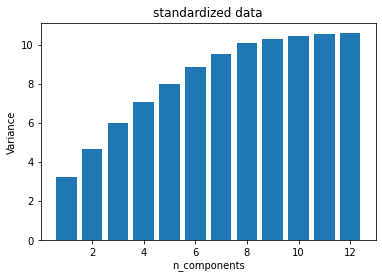

In [303]:
pca_bar=PCA_scratch(x_train_standardized,x_train_standardized.shape[1])
x_train_pca_stnd_bar=pca_bar.fit_transform()
#pca_bar.eigenval=sorted(pca_bar.eigenval)[::-1]
std_variance_list=[pca_bar.eigenval[0]]
for i in range (1,len(pca_bar.eigenval)):
  std_variance_list.append(std_variance_list[i-1]+pca_bar.eigenval[i])
plt.bar(np.arange(1,(x_train_standardized.shape[1])+1,1),std_variance_list)
plt.ylabel('Variance')
plt.xlabel('n_components')
plt.title('standardized data')
plt.show()

In [304]:
x_train_non_standardized

,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore
123,0,4,0,1,1,0,3,0,1.000,1130.0,0,0
554,0,0,0,1,3,0,1,0,0.700,20.0,0,0
180,0,0,85,1,1,0,3,0,3.200,609.9,0,0
161,0,0,0,1,1,0,1,0,3.200,609.9,0,0
754,0,0,0,1,2,0,1,1,1.200,609.9,4170,0
...,...,...,...,...,...,...,...,...,...,...,...,...
534,1,45,0,1,1,0,1,0,1.500,640.0,0,0
584,3,0,0,1,1,0,1,1,0.699,609.0,612,0
493,6,0,0,1,1,310,3,1,2.501,1275.0,4880,0
527,0,0,85,1,1,0,3,0,3.201,190.0,0,0


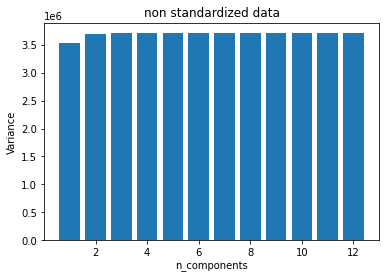

In [305]:
pca_non_std_bar=PCA_scratch(x_train_non_standardized,x_train_non_standardized.shape[1])
x_train_pca_non_stnd_bar=pca_non_std_bar.fit_transform()
#pca_bar.eigenval=sorted(pca_bar.eigenval)[::-1]
non_std_variance_list=[pca_non_std_bar.eigenval[0]]
for i in range (1,len(pca_non_std_bar.eigenval)):
  non_std_variance_list.append(non_std_variance_list[i-1]+pca_non_std_bar.eigenval[i])
plt.bar(np.arange(1,(x_train_non_standardized.shape[1])+1,1),non_std_variance_list)
plt.ylabel('Variance')
plt.xlabel('n_components')
plt.title('non standardized data')
plt.show()

### optimal value of n_components i.e. when variance=98%

In [306]:
sum_std=sum(pca_bar.eigenval)
for i in range(len(std_variance_list)):
  std_variance_list[i]=(std_variance_list[i]/sum_std)*100
  if(std_variance_list[i]>=98):
    print("best value of n_components:",i+1)
    break


best value of n_components: 10


In [307]:
sum_non_std=sum(pca_non_std_bar.eigenval)
for i in range(len(non_std_variance_list)):
  non_std_variance_list[i]=(non_std_variance_list[i]/sum_non_std)*100
  if(non_std_variance_list[i]>=96.5):
    print("best value of n_components:",i+1)
    break

best value of n_components: 2


### model with most optimal value of n_components

#### standardized dataset

In [308]:
pca_stnd=PCA_scratch(x_train_standardized,10)
x_train_pca_stnd=pca_stnd.fit_transform()
print(x_train_pca_stnd.shape)

(518, 10)


#### non standardized dataset

In [309]:
pca_non_stnd=PCA_scratch(x_train_non_standardized,2)
x_train_pca_non_stnd=pca_non_stnd.fit_transform()
print(x_train_pca_non_stnd.shape)

(518, 2)


### scatter plot with eigen vectors

#### standardized dataset

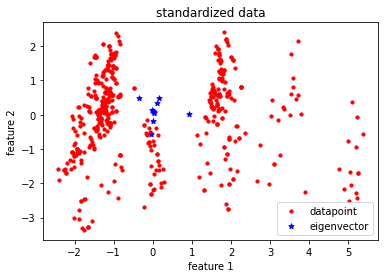

In [310]:
plt.scatter(x_train_pca_stnd[:,0],x_train_pca_stnd[:,1],s=10,c='r', marker='o',label='datapoint')
plt.scatter(pca_stnd.eigenvector[:,0],pca_stnd.eigenvector[:,1],s=30,c='blue',marker='*',label='eigenvector')
plt.legend()
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('standardized data')
plt.show()

#### non standardized dataset

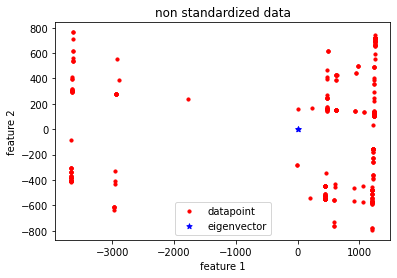

In [311]:
plt.scatter(x_train_pca_non_stnd[:,0],x_train_pca_non_stnd[:,1],s=10,c='r', marker='o',label='datapoint')
plt.scatter(pca_non_stnd.eigenvector[:,0],pca_non_stnd.eigenvector[:,1],s=30,c='blue',marker='*',label='eigenvector')
plt.legend()
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('non standardized data')
plt.show()

## **Part 6**
Train 2-3 chosen classification models alongside 5-Fold Cross-Validation Plots.

### standardized data

In [312]:
svm_model_pca=SVC()
svm_model_pca.fit(x_train_pca_stnd,y_train_standardized)
cross_validation_score_svm_standardized_pca=np.array(cross_val_score(svm_model_pca,x_train_pca_stnd,y_train_standardized))
print('Cross Validation Score for SVM with standardized data with pca is',cross_validation_score_svm_standardized_pca.mean())

Cross Validation Score for SVM with standardized data with pca is 0.8224234503360718


In [313]:
random_forest_model_pca=RandomForestClassifier()
random_forest_model_pca.fit(x_train_pca_stnd,y_train_standardized)
cross_validation_score_random_forest_standardized_pca=np.array(cross_val_score(random_forest_model_pca,x_train_pca_stnd,y_train_standardized))
print('Cross Validation Score for Random Forest with standardized data with pca is',cross_validation_score_random_forest_standardized_pca.mean())

Cross Validation Score for Random Forest with standardized data with pca is 0.8784167289021658


In [314]:
KNN_model_pca=KNeighborsClassifier()
KNN_model_pca.fit(x_train_pca_stnd,y_train_standardized)
cross_validation_score_KNN_standardized_pca=np.array(cross_val_score(KNN_model_pca,x_train_pca_stnd,y_train_standardized))
print('Cross Validation Score for KNN with standardized data with pca is',cross_validation_score_KNN_standardized_pca.mean())

Cross Validation Score for KNN with standardized data with pca is 0.8494398805078417


### non standardized data

In [315]:
svm_model=SVC()
svm_model.fit(x_train_pca_non_stnd,y_train_non_standardized)
cross_validation_score_svm_non_standardized_pca=np.array(cross_val_score(svm_model,x_train_pca_non_stnd,y_train_non_standardized))
print('Cross Validation Score for SVM with non standardized data with pca is',cross_validation_score_svm_non_standardized_pca.mean())

Cross Validation Score for SVM with non standardized data with pca is 0.7606235997012696


In [316]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train_pca_non_stnd,y_train_non_standardized)
cross_validation_score_random_forest_non_standardized_pca=np.array(cross_val_score(random_forest_model,x_train_pca_non_stnd,y_train_non_standardized))
print('Cross Validation Score for Random Forest with non standardized data with pca is',cross_validation_score_random_forest_non_standardized_pca.mean())

Cross Validation Score for Random Forest with non standardized data with pca is 0.7779499626587005


In [317]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train_pca_non_stnd,y_train_non_standardized)
cross_validation_score_KNN_non_standardized_pca=np.array(cross_val_score(KNN_model,x_train_pca_non_stnd,y_train_non_standardized))
print('Cross Validation Score for KNN with non standardized data with pca is',cross_validation_score_KNN_non_standardized_pca.mean())

Cross Validation Score for KNN with non standardized data with pca is 0.7335884988797611


### 5-Fold Cross-Validation Plots

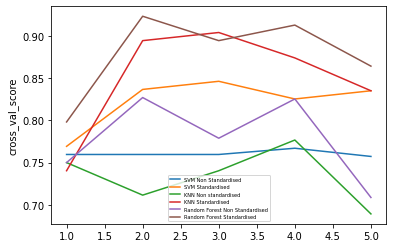

In [318]:
x=np.arange(1,6,1)
plt.plot(x,cross_validation_score_svm_non_standardized_pca,label='SVM Non Standardised')
plt.plot(x,cross_validation_score_svm_standardized_pca,label='SVM Standardised')
plt.plot(x,cross_validation_score_KNN_non_standardized_pca,label='KNN Non standardised')
plt.plot(x,cross_validation_score_KNN_standardized_pca,label='KNN Standardised')
plt.plot(x,cross_validation_score_random_forest_non_standardized_pca,label='Random Forest Non Standardised')
plt.plot(x,cross_validation_score_random_forest_standardized_pca,label='Random Forest Standardised')
plt.ylabel('cross_val_score')
plt.legend(fontsize=5)
plt.show()

## **Part 7**
Show the Test results of Classification Models on both types of datasets (Before and After PCA), via 2-3 Evaluation Metrics of choice (Ex:- Accuracy, Sensitivity, F1-Score, etc.) with the
proper reasonings.

In [319]:
from sklearn.metrics import f1_score, accuracy_score, recall_score

### Before PCA

#### 1. SVM model

In [320]:
svm_model=SVC()
svm_model.fit(x_train_standardized,y_train_standardized)
svm_predicted_bef_pca_std=svm_model.predict(x_train_standardized)
print("f1 score for standardized data before pca of svm model:",f1_score(y_train_standardized,svm_predicted_bef_pca_std,average='weighted'))
print("accuracy_score score for standardized data before pca of svm model:",accuracy_score(y_train_standardized,svm_predicted_bef_pca_std))
print("recall_score for standardized data before pca of svm model:",recall_score(y_train_standardized,svm_predicted_bef_pca_std,average='weighted'))

f1 score for standardized data before pca of svm model: 0.856873926137426
accuracy_score score for standardized data before pca of svm model: 0.8783783783783784
recall_score for standardized data before pca of svm model: 0.8783783783783784


In [321]:
svm_model=SVC()
svm_model.fit(x_train_non_standardized,y_train_non_standardized)
svm_predicted_bef_pca_non_std=svm_model.predict(x_train_non_standardized)
print("f1 score for non_standardized data before pca of svm model:",f1_score(y_train_non_standardized,svm_predicted_bef_pca_non_std,average='weighted'))
print("accuracy_score score for non_standardized data before pca of svm model:",accuracy_score(y_train_non_standardized,svm_predicted_bef_pca_non_std))
print("recall_score for non_standardized data before pca of svm model:",recall_score(y_train_non_standardized,svm_predicted_bef_pca_non_std,average='weighted'))

f1 score for non_standardized data before pca of svm model: 0.657200433516223
accuracy_score score for non_standardized data before pca of svm model: 0.7606177606177607
recall_score for non_standardized data before pca of svm model: 0.7606177606177607


#### 2. Random Forest

In [322]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train_standardized,y_train_standardized)
random_forest_model_predicted_bef_pca_std=random_forest_model.predict(x_train_standardized)
print("f1 score for standardized data before pca of Random Forest model:",f1_score(y_train_standardized,random_forest_model_predicted_bef_pca_std,average='weighted'))
print("accuracy_score score for standardized data before pca of Random Forest model:",accuracy_score(y_train_standardized,random_forest_model_predicted_bef_pca_std))
print("recall_score for standardized data before pca of Random Forest model:",recall_score(y_train_standardized,random_forest_model_predicted_bef_pca_std,average='weighted'))

f1 score for standardized data before pca of Random Forest model: 0.9941989417482934
accuracy_score score for standardized data before pca of Random Forest model: 0.9942084942084942
recall_score for standardized data before pca of Random Forest model: 0.9942084942084942


In [323]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train_non_standardized,y_train_non_standardized)
random_forest_model_predicted_bef_pca_non_std=random_forest_model.predict(x_train_non_standardized)
print("f1 score for non standardized data before pca of Random Forest model:",f1_score(y_train_non_standardized,random_forest_model_predicted_bef_pca_non_std,average='weighted'))
print("accuracy_score score for non standardized data before pca of Random Forest model:",accuracy_score(y_train_non_standardized,random_forest_model_predicted_bef_pca_non_std))
print("recall_score for non standardized data before pca of Random Forest model:",recall_score(y_train_non_standardized,random_forest_model_predicted_bef_pca_non_std,average='weighted'))

f1 score for non standardized data before pca of Random Forest model: 0.9941723857655339
accuracy_score score for non standardized data before pca of Random Forest model: 0.9942084942084942
recall_score for non standardized data before pca of Random Forest model: 0.9942084942084942


#### 3. KNN_model

In [324]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train_standardized,y_train_standardized)
KNN_model_predicted_bef_pca_std=KNN_model.predict(x_train_standardized)
print("f1 score for standardized data before pca of KNN_model:",f1_score(y_train_standardized,KNN_model_predicted_bef_pca_std,average='weighted'))
print("accuracy_score score for standardized data before pca of KNN_model:",accuracy_score(y_train_standardized,KNN_model_predicted_bef_pca_std))
print("recall_score for standardized data before pca of KNN_model:",recall_score(y_train_standardized,KNN_model_predicted_bef_pca_std,average='weighted'))

f1 score for standardized data before pca of KNN_model: 0.9017532804733915
accuracy_score score for standardized data before pca of KNN_model: 0.9034749034749034
recall_score for standardized data before pca of KNN_model: 0.9034749034749034


In [325]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train_non_standardized,y_train_non_standardized)
KNN_model_predicted_bef_pca_non_std=KNN_model.predict(x_train_non_standardized)
print("f1 score for non standardized data before pca of KNN_model:",f1_score(y_train_non_standardized,KNN_model_predicted_bef_pca_non_std,average='weighted'))
print("accuracy_score score for non standardized data before pca of KNN_model:",accuracy_score(y_train_non_standardized,KNN_model_predicted_bef_pca_non_std))
print("recall_score for non standardized data before pca of KNN_model:",recall_score(y_train_non_standardized,KNN_model_predicted_bef_pca_non_std,average='weighted'))

f1 score for non standardized data before pca of KNN_model: 0.8494259863309176
accuracy_score score for non standardized data before pca of KNN_model: 0.859073359073359
recall_score for non standardized data before pca of KNN_model: 0.859073359073359


### After PCA

#### 1. SVM model

In [326]:
svm_model_pca=SVC()
svm_model_pca.fit(x_train_pca_stnd,y_train_standardized)
svm_predicted_aft_pca_std=svm_model_pca.predict(x_train_pca_stnd)
print("f1 score for standardized data after pca of svm model:",f1_score(y_train_standardized,svm_predicted_aft_pca_std,average='weighted'))
print("accuracy_score score for standardized data after pca of svm model:",accuracy_score(y_train_standardized,svm_predicted_aft_pca_std))
print("recall_score for standardized data after pca of svm model:",recall_score(y_train_standardized,svm_predicted_aft_pca_std,average='weighted'))

f1 score for standardized data after pca of svm model: 0.833663497438156
accuracy_score score for standardized data after pca of svm model: 0.8706563706563707
recall_score for standardized data after pca of svm model: 0.8706563706563707


In [327]:
svm_model=SVC()
svm_model.fit(x_train_pca_non_stnd,y_train_non_standardized)
svm_predicted_aft_pca_non_std=svm_model.predict(x_train_pca_non_stnd)
print("f1 score for non standardized data after pca of svm model:",f1_score(y_train_non_standardized,svm_predicted_aft_pca_non_std,average='weighted'))
print("accuracy_score score for non standardized data after pca of svm model:",accuracy_score(y_train_non_standardized,svm_predicted_aft_pca_non_std))
print("recall_score for non standardized data after pca of svm model:",recall_score(y_train_non_standardized,svm_predicted_aft_pca_non_std,average='weighted'))

f1 score for non standardized data after pca of svm model: 0.657200433516223
accuracy_score score for non standardized data after pca of svm model: 0.7606177606177607
recall_score for non standardized data after pca of svm model: 0.7606177606177607


#### 2. Random Forest

In [328]:
random_forest_model_pca=RandomForestClassifier()
random_forest_model_pca.fit(x_train_pca_stnd,y_train_standardized)
random_forest_model_aft_pca_std=random_forest_model_pca.predict(x_train_pca_stnd)
print("f1 score for standardized data after pca of random_forest_model:",f1_score(y_train_standardized,random_forest_model_aft_pca_std,average='weighted'))
print("accuracy_score score for standardized data after pca of random_forest_model:",accuracy_score(y_train_standardized,random_forest_model_aft_pca_std))
print("recall_score for standardized data after pca of random_forest_model:",recall_score(y_train_standardized,random_forest_model_aft_pca_std,average='weighted'))

f1 score for standardized data after pca of random_forest_model: 0.9942176847386505
accuracy_score score for standardized data after pca of random_forest_model: 0.9942084942084942
recall_score for standardized data after pca of random_forest_model: 0.9942084942084942


In [329]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train_pca_non_stnd,y_train_non_standardized)
random_forest_model_predicted_aft_pca_non_std=random_forest_model.predict(x_train_pca_non_stnd)
print("f1 score for non standardized data after pca of Random Forest model:",f1_score(y_train_non_standardized,random_forest_model_predicted_aft_pca_non_std,average='weighted'))
print("accuracy_score score for non standardized data after pca of Random Forest model:",accuracy_score(y_train_non_standardized,random_forest_model_predicted_aft_pca_non_std))
print("recall_score for non standardized data after pca of Random Forest model:",recall_score(y_train_non_standardized,random_forest_model_predicted_aft_pca_non_std,average='weighted'))

f1 score for non standardized data after pca of Random Forest model: 0.9727444747750239
accuracy_score score for non standardized data after pca of Random Forest model: 0.972972972972973
recall_score for non standardized data after pca of Random Forest model: 0.972972972972973


#### 3. KNN_model

In [330]:
KNN_model_pca=KNeighborsClassifier()
KNN_model_pca.fit(x_train_pca_stnd,y_train_standardized)
KNN_model_predicted_aft_pca_std=KNN_model_pca.predict(x_train_pca_stnd)
print("f1 score for standardized data after pca of KNN_model:",f1_score(y_train_standardized,KNN_model_predicted_aft_pca_std,average='weighted'))
print("accuracy_score score for standardized data after pca of KNN_model:",accuracy_score(y_train_standardized,KNN_model_predicted_aft_pca_std))
print("recall_score for standardized data after pca of KNN_model:",recall_score(y_train_standardized,KNN_model_predicted_aft_pca_std,average='weighted'))

f1 score for standardized data after pca of KNN_model: 0.9055067916141887
accuracy_score score for standardized data after pca of KNN_model: 0.9073359073359073
recall_score for standardized data after pca of KNN_model: 0.9073359073359073


In [331]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train_pca_non_stnd,y_train_non_standardized)
KNN_model_predicted_aft_pca_non_std=KNN_model.predict(x_train_pca_non_stnd)
print("f1 score for non standardized data after pca of KNN_model:",f1_score(y_train_non_standardized,KNN_model_predicted_aft_pca_non_std,average='weighted'))
print("accuracy_score score for non standardized data after pca of KNN_model:",accuracy_score(y_train_non_standardized,KNN_model_predicted_aft_pca_non_std))
print("recall_score for non standardized data after pca of KNN_model:",recall_score(y_train_non_standardized,KNN_model_predicted_aft_pca_non_std,average='weighted'))

f1 score for non standardized data after pca of KNN_model: 0.8054094792437857
accuracy_score score for non standardized data after pca of KNN_model: 0.8301158301158301
recall_score for non standardized data after pca of KNN_model: 0.8301158301158301


## **Part 8**
Were any changes observed before and after implementing PCA, with respect to the
distribution of the dataset? Also, make any suitable graph through which the optimal number of principal components can be decided for optimal results.

variance fraction for n_components= 1 is 0.30523955819054793
variance fraction for n_components= 1 is 0.30523955819054793
variance fraction for n_components= 2 is 0.44214042004725834
variance fraction for n_components= 3 is 0.5666395066289425
variance fraction for n_components= 4 is 0.6691311779670623
variance fraction for n_components= 5 is 0.7567060676990104
variance fraction for n_components= 6 is 0.8377018860694614
variance fraction for n_components= 7 is 0.9004439451178392
variance fraction for n_components= 8 is 0.9541778589478769
variance fraction for n_components= 9 is 0.9731919372751564
variance fraction for n_components= 10 is 0.9858201429605171
variance fraction for n_components= 11 is 0.9966680095519989
variance fraction for n_components= 12 is 1.0


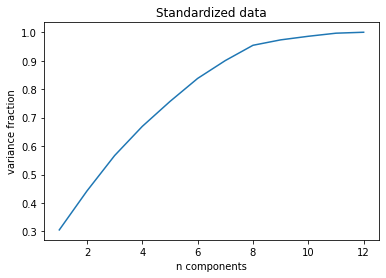

In [332]:
pca_=PCA_scratch(x_train_standardized,x_train_standardized.shape[1])
x_train_pca_stnd=pca_.fit_transform()
sum_=sum(pca_.eigenval)
variance_fraction_list=[pca_.eigenval[0]]
print("variance fraction for n_components=",1,"is",variance_fraction_list[0]/sum_)
for i in range (1,len(pca_.eigenval)):
  variance_fraction_list.append(variance_fraction_list[i-1]+pca_.eigenval[i])
for i in range(len(pca_.eigenval)):
  variance_fraction_list[i]/=sum_
  print("variance fraction for n_components=",i+1,"is",variance_fraction_list[i])
plt.plot(np.arange(1,x_train_standardized.shape[1]+1,1),variance_fraction_list)
plt.title('Standardized data')
plt.xlabel('n components')
plt.ylabel('variance fraction')
plt.show()

variance fraction for n_components= 1 is 0.9520618683752533
variance fraction for n_components= 1 is 0.9520618683752533
variance fraction for n_components= 2 is 0.9956303380948849
variance fraction for n_components= 3 is 0.9997933570852808
variance fraction for n_components= 4 is 0.9999537652179782
variance fraction for n_components= 5 is 0.9999988184708178
variance fraction for n_components= 6 is 0.9999994611241584
variance fraction for n_components= 7 is 0.9999996800763475
variance fraction for n_components= 8 is 0.9999998648860298
variance fraction for n_components= 9 is 0.9999999197750351
variance fraction for n_components= 10 is 0.999999958528975
variance fraction for n_components= 11 is 0.9999999904492084
variance fraction for n_components= 12 is 1.0


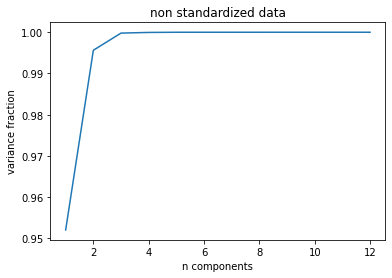

In [333]:
pca_=PCA_scratch(x_train_non_standardized,x_train_non_standardized.shape[1])
x_train_pca_non_stnd=pca_.fit_transform()
sum_=sum(pca_.eigenval)
variance_fraction_list=[pca_.eigenval[0]]
print("variance fraction for n_components=",1,"is",variance_fraction_list[0]/sum_)
for i in range (1,len(pca_.eigenval)):
  variance_fraction_list.append(variance_fraction_list[i-1]+pca_.eigenval[i])
for i in range(len(pca_.eigenval)):
  variance_fraction_list[i]/=sum_
  print("variance fraction for n_components=",i+1,"is",variance_fraction_list[i])
plt.plot(np.arange(1,x_train_non_standardized.shape[1]+1,1),variance_fraction_list)
plt.title('non standardized data')
plt.xlabel('n components')
plt.ylabel('variance fraction')
plt.show()

## **Bonus**
Assuming the Naive Bayes assumption, calculate the eigenvector, eigenvalues and
principal components. Do part 6 with these new feature vectors and comment on
advantages/disadvantages you observed with this assumption.

In [334]:
#The assumption made by naive Bayes is that the features are independent of one another, which results in the covariance matrix being a diagonal matrix.

from sklearn.decomposition import PCA
class PCA_scratch_naive_bayes:
   def __init__(self,dataset,n_components):
     self.df=dataset.copy()
     self.comp=n_components
     self.eigenval=None
     self.eigenvector=None

   def cov_mat(self):
     #print(self.df)
     c=len(self.df.axes[1])
     r=len(self.df.axes[0])
     n=r
     matrix=np.zeros((c,c))
     for i in range(c):
       mean_of_i=np.sum(self.df.iloc[:, i])/n
       for j in range(c):
         mean_of_j=np.sum(self.df.iloc[:, j])/n
         if(i==j):
            matrix[i][j]=np.sum((self.df.iloc[:, i]- mean_of_i)*(self.df.iloc[:, j]- mean_of_j))/(n - 1)
         else:
            matrix[i][j]=0
     #print(matrix)
     return matrix

   def eigen(self):
     eigen_val,eigen_vec=eig(self.cov_mat())
     #print(eigen_vec)
     eigen_vec=eigen_vec.transpose()

     return eigen_val,eigen_vec
  
   def principal_comp(self):
     eig_val,eig_vec=self.eigen()
     pairs_eig_val_vec=[]
     length=len(eig_val)
     for i in range(length):
       pairs_eig_val_vec.append([eig_val[i],eig_vec[i]])
     pairs_eig_val_vec=sorted(pairs_eig_val_vec)[::-1]
     princ_comp=[]
     self.eigenval=[]
     for i in range(self.comp):
       princ_comp.append(pairs_eig_val_vec[i][1])
       self.eigenval.append(pairs_eig_val_vec[i][0])
     princ_comp=np.array(princ_comp)
     self.eigenvector=princ_comp
     return princ_comp
     
   def inbuilt(self):
     principal=PCA(n_components=self.comp)
     x=principal.fit_transform(self.df)
     compo=principal.components_
     return compo
   def fit_transform(self):
     principal_comp=self.principal_comp()
     #print(principal_comp)
     for i in self.df.columns:
       self.df[i] =(self.df[i] - self.df[i].mean())
     transformed_df=np.dot(self.df,principal_comp.T)
     return transformed_df

    
  

#### standardized dataset

In [335]:
pca_stnd=PCA_scratch_naive_bayes(x_train_standardized,10)
x_train_pca_stnd=pca_stnd.fit_transform()
print(x_train_pca_stnd.shape)

(518, 10)


In [336]:
svm_model_pca=SVC()
svm_model_pca.fit(x_train_pca_stnd,y_train_standardized)
svm_model_aft_pca_std=svm_model_pca.predict(x_train_pca_stnd)
cross_validation_score_svm_standardized_pca=np.array(cross_val_score(svm_model_pca,x_train_pca_stnd,y_train_standardized))
print('Cross Validation Score for SVM with standardized data with pca is',cross_validation_score_svm_standardized_pca.mean())
print("f1 score for standardized data after pca of svm model:",f1_score(y_train_standardized,svm_predicted_aft_pca_std,average='weighted'))
print("accuracy_score for standardized data after pca of svm model:",accuracy_score(y_train_standardized,svm_predicted_aft_pca_std))
print("recall_score for standardized data after pca of svm model:",recall_score(y_train_standardized,svm_predicted_aft_pca_std,average='weighted'))

Cross Validation Score for SVM with standardized data with pca is 0.8166168782673637
f1 score for standardized data after pca of svm model: 0.833663497438156
accuracy_score for standardized data after pca of svm model: 0.8706563706563707
recall_score for standardized data after pca of svm model: 0.8706563706563707


In [337]:
random_forest_model_pca=RandomForestClassifier()
random_forest_model_pca.fit(x_train_pca_stnd,y_train_standardized)
random_forest_model_aft_pca_std=random_forest_model_pca.predict(x_train_pca_stnd)
cross_validation_score_random_forest_model_standardized_pca=np.array(cross_val_score(random_forest_model_pca,x_train_pca_stnd,y_train_standardized))
print('Cross Validation Score for rondom forest with standardized data with pca is',cross_validation_score_random_forest_model_standardized_pca.mean())
print("f1 score for standardized data after pca of random_forest_model:",f1_score(y_train_standardized,random_forest_model_aft_pca_std,average='weighted'))
print("accuracy_score score for standardized data after pca of random_forest_model:",accuracy_score(y_train_standardized,random_forest_model_aft_pca_std))
print("recall_score for standardized data after pca of random_forest_model:",recall_score(y_train_standardized,random_forest_model_aft_pca_std,average='weighted'))

Cross Validation Score for rondom forest with standardized data with pca is 0.9343539955190441
f1 score for standardized data after pca of random_forest_model: 0.9941989417482934
accuracy_score score for standardized data after pca of random_forest_model: 0.9942084942084942
recall_score for standardized data after pca of random_forest_model: 0.9942084942084942


In [338]:
KNN_model_pca=KNeighborsClassifier()
KNN_model_pca.fit(x_train_pca_stnd,y_train_standardized)
KNN_model_predicted_aft_pca_std=KNN_model_pca.predict(x_train_pca_stnd)
cross_validation_score_KNN_model_standardized_pca=np.array(cross_val_score(KNN_model_pca,x_train_pca_stnd,y_train_standardized))
print('Cross Validation Score for knn with standardized data with pca is',cross_validation_score_KNN_model_standardized_pca.mean())
print("f1 score for standardized data after pca of KNN_model:",f1_score(y_train_standardized,KNN_model_predicted_aft_pca_std,average='weighted'))
print("accuracy_score score for standardized data after pca of KNN_model:",accuracy_score(y_train_standardized,KNN_model_predicted_aft_pca_std))
print("recall_score for standardized data after pca of KNN_model:",recall_score(y_train_standardized,KNN_model_predicted_aft_pca_std,average='weighted'))

Cross Validation Score for knn with standardized data with pca is 0.8435959671396563
f1 score for standardized data after pca of KNN_model: 0.8998539243270564
accuracy_score score for standardized data after pca of KNN_model: 0.9015444015444015
recall_score for standardized data after pca of KNN_model: 0.9015444015444015


#### non standardized dataset

In [339]:
pca_non_stnd=PCA_scratch_naive_bayes(x_train_non_standardized,2)
x_train_pca_non_stnd=pca_non_stnd.fit_transform()
print(x_train_pca_non_stnd.shape)

(518, 2)


In [340]:
svm_model=SVC()
svm_model.fit(x_train_pca_non_stnd,y_train_non_standardized)
svm_predicted_aft_pca_non_std=svm_model.predict(x_train_pca_non_stnd)
cross_validation_score_svm_non_standardized_pca=np.array(cross_val_score(svm_model,x_train_pca_non_stnd,y_train_non_standardized))
print('Cross Validation Score for SVM with non standardized data with pca is',cross_validation_score_svm_non_standardized_pca.mean())
print("f1 score for non standardized data after pca of svm model:",f1_score(y_train_non_standardized,svm_predicted_aft_pca_non_std,average='weighted'))
print("accuracy_score score for non standardized data after pca of svm model:",accuracy_score(y_train_non_standardized,svm_predicted_aft_pca_non_std))
print("recall_score for non standardized data after pca of svm model:",recall_score(y_train_non_standardized,svm_predicted_aft_pca_non_std,average='weighted'))

Cross Validation Score for SVM with non standardized data with pca is 0.7606235997012696
f1 score for non standardized data after pca of svm model: 0.657200433516223
accuracy_score score for non standardized data after pca of svm model: 0.7606177606177607
recall_score for non standardized data after pca of svm model: 0.7606177606177607


In [341]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train_pca_non_stnd,y_train_non_standardized)
random_forest_model_predicted_aft_pca_non_std=random_forest_model.predict(x_train_pca_non_stnd)
cross_validation_score_random_forest_non_standardized_pca=np.array(cross_val_score(random_forest_model,x_train_pca_non_stnd,y_train_non_standardized))
print('Cross Validation Score for Random Forest with non standardized data with pca is',cross_validation_score_random_forest_non_standardized_pca.mean())
print("f1 score for non standardized data after pca of Random Forest model:",f1_score(y_train_non_standardized,random_forest_model_predicted_aft_pca_non_std,average='weighted'))
print("accuracy_score score for non standardized data after pca of Random Forest model:",accuracy_score(y_train_non_standardized,random_forest_model_predicted_aft_pca_non_std))
print("recall_score for non standardized data after pca of Random Forest model:",recall_score(y_train_non_standardized,random_forest_model_predicted_aft_pca_non_std,average='weighted'))

Cross Validation Score for Random Forest with non standardized data with pca is 0.7586258401792383
f1 score for non standardized data after pca of Random Forest model: 0.8076783602916008
accuracy_score score for non standardized data after pca of Random Forest model: 0.8359073359073359
recall_score for non standardized data after pca of Random Forest model: 0.8359073359073359


In [342]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train_pca_non_stnd,y_train_non_standardized)
KNN_model_predicted_aft_pca_non_std=KNN_model.predict(x_train_pca_non_stnd)
cross_validation_score_KNN_non_standardized_pca=np.array(cross_val_score(KNN_model,x_train_pca_non_stnd,y_train_non_standardized))
print('Cross Validation Score for KNN with non standardized data with pca is',cross_validation_score_KNN_non_standardized_pca.mean())
print("f1 score for non standardized data after pca of KNN_model:",f1_score(y_train_non_standardized,KNN_model_predicted_aft_pca_non_std,average='weighted'))
print("accuracy_score score for non standardized data after pca of KNN_model:",accuracy_score(y_train_non_standardized,KNN_model_predicted_aft_pca_non_std))
print("recall_score for non standardized data after pca of KNN_model:",recall_score(y_train_non_standardized,KNN_model_predicted_aft_pca_non_std,average='weighted'))

Cross Validation Score for KNN with non standardized data with pca is 0.7548356982823002
f1 score for non standardized data after pca of KNN_model: 0.7149365847783353
accuracy_score score for non standardized data after pca of KNN_model: 0.752895752895753
recall_score for non standardized data after pca of KNN_model: 0.752895752895753


### cross validation plot

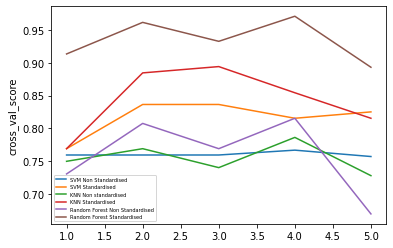

In [343]:
x=np.arange(1,6,1)
plt.plot(x,cross_validation_score_svm_non_standardized_pca,label='SVM Non Standardised')
plt.plot(x,cross_validation_score_svm_standardized_pca,label='SVM Standardised')
plt.plot(x,cross_validation_score_KNN_non_standardized_pca,label='KNN Non standardised')
plt.plot(x,cross_validation_score_KNN_model_standardized_pca,label='KNN Standardised')
plt.plot(x,cross_validation_score_random_forest_non_standardized_pca,label='Random Forest Non Standardised')
plt.plot(x,cross_validation_score_random_forest_model_standardized_pca,label='Random Forest Standardised')
plt.ylabel('cross_val_score')
plt.legend(fontsize=5)
plt.show()

# **Question 2**

In [344]:
df=pd.read_csv('wine.data')
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [345]:
df.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [346]:
for i in df.columns:
  print(i,":",Counter(df[i]))

class : Counter({2: 71, 1: 59, 3: 48})
Alcohol : Counter({13.05: 6, 12.37: 6, 12.08: 5, 12.29: 4, 12.0: 3, 12.42: 3, 12.25: 3, 13.16: 2, 13.24: 2, 14.06: 2, 13.86: 2, 14.1: 2, 14.38: 2, 13.83: 2, 12.93: 2, 13.71: 2, 12.85: 2, 13.5: 2, 13.73: 2, 13.58: 2, 13.48: 2, 14.22: 2, 13.56: 2, 13.88: 2, 12.33: 2, 13.11: 2, 13.49: 2, 11.84: 2, 12.7: 2, 12.72: 2, 12.6: 2, 11.82: 2, 12.51: 2, 12.77: 2, 13.17: 2, 13.4: 2, 14.23: 1, 13.2: 1, 14.37: 1, 14.2: 1, 14.39: 1, 14.83: 1, 14.12: 1, 13.75: 1, 14.75: 1, 13.63: 1, 14.3: 1, 14.19: 1, 13.64: 1, 13.39: 1, 13.3: 1, 13.87: 1, 14.02: 1, 13.68: 1, 13.76: 1, 13.51: 1, 13.28: 1, 13.07: 1, 13.41: 1, 14.21: 1, 13.9: 1, 13.94: 1, 13.82: 1, 13.77: 1, 13.74: 1, 13.29: 1, 13.72: 1, 12.64: 1, 13.67: 1, 12.17: 1, 13.34: 1, 12.21: 1, 12.99: 1, 11.96: 1, 11.66: 1, 13.03: 1, 12.67: 1, 12.16: 1, 11.65: 1, 11.64: 1, 12.69: 1, 11.62: 1, 12.47: 1, 11.81: 1, 12.34: 1, 12.22: 1, 11.61: 1, 11.46: 1, 12.52: 1, 11.76: 1, 11.41: 1, 11.03: 1, 11.45: 1, 11.56: 1, 11.87: 1, 12.

In [347]:
scaler=StandardScaler()
data=df.copy()
scaler.fit(data.iloc[:,1:])
data.iloc[:,1:]=scaler.transform(data.iloc[:,1:])

In [348]:
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [349]:
data

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,3,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,3,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,3,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [350]:
x=data.iloc[:,1:]
y=data.iloc[:,0]


In [351]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [352]:
print(x_train)
print(y_train)

      Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
90  -1.137207   -0.454530 -0.170035          -0.298767  -1.315908   
95  -0.655454   -0.732806 -0.608676          -0.148624   4.371372   
28   1.073917   -0.391694  1.584529          -0.028510   0.509638   
124 -1.396613    1.771674  0.085839           0.451946  -1.245695   
135 -0.494869    0.110998 -0.608676          -0.298767  -0.403135   
..        ...         ...       ...                ...        ...   
133 -0.371343    1.089450 -0.023821           0.602088   0.439425   
137 -0.581338    2.848870  0.999674           1.653086  -0.262708   
72   0.604516   -0.607133 -0.462462           1.352801  -0.894628   
140 -0.087232    0.425180  1.218995           0.451946  -0.262708   
37   0.061000   -0.616110  0.670693          -0.448909  -0.122282   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
90       -1.113800   -0.531369              1.274310         0.086029   
95        0.328298    0.2

In [353]:
Counter(y_train)

Counter({2: 52, 1: 36, 3: 36})

## **Part1**
Implement Linear Discriminant Analysis from scratch with the following subtasks:-
a. A function for computing within class and between class scatter matrices.
b. A function that will automatically select the number of linear discriminants based upon
the percentage of variance that needs to be conserved

In [354]:
import math
class LDA_scratch:
   def __init__(self,x_training,y_training,per_variance):
     self.x_t=x_training.copy()
     self.y_t=y_training.copy()
     self.df=None
     self.eigenval=None
     self.eigenvec=None
     self.lin_dis=None
     self.per_variance=per_variance


   def within_between_class_mat(self):
     s=set(self.y_t)
     n_columns=(self.x_t.shape[1])
     Sw=np.zeros((n_columns,n_columns))
     Sb=np.zeros((n_columns,n_columns))
     self.df=self.x_t.copy()
     mean_x = np.mean(self.x_t, axis=0)
     self.df['out']=list(self.y_t)
     for i in s:
       xc=self.df[self.df['out']==i]
       xc=xc.iloc[:,:-1]
       mean_c = np.mean(xc, axis=0)
       a=(xc - np.mean(xc, axis=0)).T
       #print(a)
       b=(xc - np.mean(xc, axis=0))
       Sw += a.dot(b)
       no_pts_xc = xc.shape[0]
       mean_difference = (np.mean(xc, axis=0)-mean_x).values.reshape(n_columns,1)
       Sb+=no_pts_xc*(mean_difference).dot(mean_difference.T)
     #print(Sw)
     Sw=np.asmatrix(Sw)
     return Sw,Sb

   

   def fit(self):
     SW,SB=self.within_between_class_mat()
     eigen_val,eigen_vec=eig(np.linalg.inv(SW)@SB)
     #print(eigen_vec)
     eigen_vec=eigen_vec.transpose()
     pairs_of_val_vec=[]
     for i in range(len(eigen_val)):
       pairs_of_val_vec.append([eigen_val[i],eigen_vec[i]])
     pairs_of_val_vec=sorted(pairs_of_val_vec)[::-1]
     lin_dis=[]
     s=0
     for i in range(len( pairs_of_val_vec)):
       pairs_of_val_vec[i][0]=np.abs(pairs_of_val_vec[i][0])
       s+=pairs_of_val_vec[i][0]
     i=0
     var_per=0
     while(var_per<=self.per_variance):
       var_per+=((pairs_of_val_vec[i][0])/s)*100
       lin_dis.append(pairs_of_val_vec[i][1])
       i+=1
    #  for i in range(len(lin_dis)):
    #    sub=[]
    #    for j in range(len(lin_dis[0])):
    #      print(lin_dis[i][j])
    #  for i in range(len(lin_dis)):
    #    for j in range(len(lin_dis[0])):
    #      lin_dis[i][j]=np.abs(lin_dis[i][j])
    #  lin_dis=np.array(lin_dis)
    #  return lin_dis
     lin_dis=np.array(lin_dis)
     lin_dis=lin_dis[:,0]
     return lin_dis

   def transform(self,x):
     self.lin_dis=self.fit()
     return x@(self.lin_dis.T)

   def prob(self,x_mean,sd):
     sd=np.array(sd)
     #print(sd)
     x_pr=x_mean.copy()
     a=1/(math.sqrt(2*math.pi))
     for i in range(len(x_mean)):
       #print(x_mean.iloc[0,:])
       for j in range(len(x_mean.iloc[0,:])):
         ans=(a*sd[j])
         ans2=-(x_mean.iloc[i,j]/2)
         x_pr.iloc[i,j]=(ans)*(math.exp((ans2)))
     return x_pr

   def post(self,xtest):
     dataf=self.x_t.copy()
     dataf['out']=list(self.y_t)
     prior=[]
     mean_l=[]
     prob__l=[]
     sd_l=[]
     for i in range(1,3):
       classdf=dataf[dataf['out']==i]
       classdf=classdf.iloc[:,:-1]
       prior.append(len(classdf))
       mean_l.append(((xtest-classdf.mean(axis=0))/classdf.std(axis=0))**2)
       sd_l.append(classdf.std(axis=0))
       x_pr=self.prob(mean_l[i-1],sd_l[i-1])
       prob__l.append(np.array(x_pr))
       #print(np.array(sd_l))
       #print(mean_l)
     s=sum(prior)
     #print(prob__l)
     for i in range(len(prior)):
       prior[i]=prior[i]/s
     #print(prior)
     classwise_posterior_list=[]
     for i in range(2):
       pr_l=[]
       for j in range(len(xtest)):
         lik=1
         for k in range(len(xtest.iloc[0,:])):
           #print(prob__l[i].iloc[j:k])
           lik*=prob__l[i][j][k]
         lik*=prior[i]
         #print(lik)
         pr_l.append(lik)
       classwise_posterior_list.append(pr_l)
     sum_classwise_posterior_list=[x + y for x, y in zip(classwise_posterior_list[0], classwise_posterior_list[1])]
     for i in range(2):
       for j in range(len(sum_classwise_posterior_list)):
         classwise_posterior_list[i][j]=classwise_posterior_list[i][j]/sum_classwise_posterior_list[j]
     return classwise_posterior_list

   def cross_val_score(self,xtest,ytest):
     y_p=[]
     ytest=list(ytest)
     classwise_post_pro=self.post(xtest)
     for i in range(len(classwise_post_pro[0])):
       if(classwise_post_pro[0][i]>classwise_post_pro[1][i]):
         y_p.append(1)
       else:
         y_p.append(2)
     ans=0
     for i in range(len(ytest)):
       if(ytest[i]==y_p[i]):
         ans+=1
     return ans/len(ytest)



   def y_pred(self,xtest):
     post_prob=self.post(xtest)
     post_prob=post_prob[1]
     y_predic=[]
     for i in range(len(post_prob)):
       thresh=post_prob[i]
       l=[]
       for j in range(len(post_prob)):
         if(post_prob[j]<=thresh):
           l.append(1)
         else:
           l.append(2)
       y_predic.append(l)
     pair=[]
     for i in range(len(post_prob)):
       pair.append([post_prob[i],y_predic[i]])
     pair.sort()
     y_pr=[]
     for i in range(len(pair)):
       y_pr.append(pair[i][1])
     return y_pr

    
   def confusion_mat(self,xtest,ytest):
     con_mat=[]
     ytest=list(ytest)
     y_predic=self.y_pred(xtest)
     #print(len(y_predic),len(xtest))
     for i in range(len(y_predic)):
       m=np.zeros((2,2))
       for j in range(len(y_predic[0])):
         if(ytest[j]==1):
           if(y_predic[i][j]==1):
             m[0][0]+=1
           else:
             m[1][0]+=1
         else:
           if(y_predic[i][j]==1):
             m[0][1]+=1
           else:
             m[1][1]+=1
       con_mat.append(m)
     return con_mat


   def roc_val(self,xtest,ytest):
     con_matr=self.confusion_mat(xtest,ytest)
     tpr=[]
     fpr=[]
     for i in range(len(xtest)):
         tp_r=con_matr[i][0][0]/(con_matr[i][1][0]+con_matr[i][0][0])
         fp_r=con_matr[i][0][1]/(con_matr[i][1][1]+con_matr[i][0][1])
         tpr.append(tp_r)
         fpr.append(fp_r)
     return tpr,fpr

   



     



  











In [355]:
cl=LDA_scratch(x_train,y_train,99)
df=x_test.copy()
df['out']=y_test
dftest=df[df['out']!=3]
xtest=dftest.iloc[:,:-1]
ytest=dftest.iloc[:,-1]
p=cl.roc_val(xtest,ytest)

## **Part2**
Vary the variance and identify features that have a high impact on the classification tasks using LDA and visualize the feature space for the same using those linear discriminants.

In [356]:
lda_model=LDA_scratch(x_train,y_train,99)
linear_disc=lda_model.fit()
print(linear_disc)

[[-0.16131531+0.j  0.00752018+0.j -0.07720426+0.j  0.22958169+0.j
  -0.00661034+0.j  0.20201623+0.j -0.65700715+0.j -0.05092048+0.j
   0.05173317+0.j  0.29395919+0.j -0.11953744+0.j -0.3001698 +0.j
  -0.4966564 +0.j]
 [-0.27969264+0.j -0.22687052+0.j -0.39977504+0.j  0.28208392+0.j
   0.07890751+0.j  0.08419709+0.j  0.28497884+0.j  0.1223246 +0.j
   0.06543804+0.j -0.39691175+0.j  0.1026976 +0.j  0.01743494+0.j
  -0.59054782+0.j]]


In [357]:
lin_dis=np.abs(linear_disc)
high_impact_features=np.argsort(lin_dis)[::-1]
print(high_impact_features)

[[11  8  4  5 10  7  1  0  3  6  9  2 12]
 [ 4  1  7  8  2 10  0  5  3  9 11 12  6]]


**Therefore, we observe that features with index=11,8,4,5 and 10 i.e. 'OD280/OD315 of diluted wines' , 'Proanthocyanins', 'Magnesium', 'Total phenols' and 'Hue' are the top 5 impactful features.**

### varying variance

In [358]:
import warnings
warnings.filterwarnings("ignore")

For variance_percentage= 99 %
The most impactful features indices:
[[12  2  9  0  1 11  8  4  5 10  7  3  6]
 [ 6 12 11  0 10  2  7  4  1  8  5  3  9]]
The top 5 most impactful features are: ['Proline ', 'Ash', 'Color intensity', 'Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines', 'Proanthocyanins', 'Magnesium', 'Total phenols', 'Hue', 'Nonflavanoid phenols', 'Alcalinity of ash', 'Flavanoids'] 



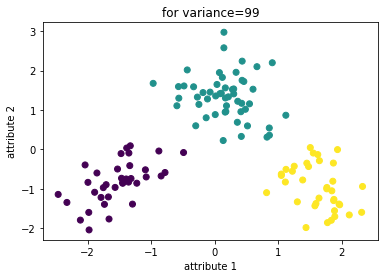





For variance_percentage= 94 %
The most impactful features indices:
[[12  2  9  0  1 11  8  4  5 10  7  3  6]
 [ 6 12 11  0 10  2  7  4  1  8  5  3  9]]
The top 5 most impactful features are: ['Proline ', 'Ash', 'Color intensity', 'Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines', 'Proanthocyanins', 'Magnesium', 'Total phenols', 'Hue', 'Nonflavanoid phenols', 'Alcalinity of ash', 'Flavanoids'] 



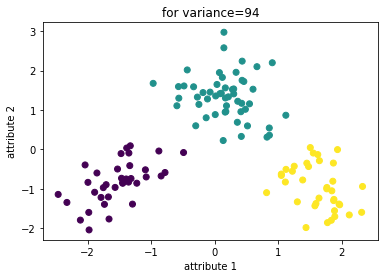





For variance_percentage= 89 %
The most impactful features indices:
[[12  2  9  0  1 11  8  4  5 10  7  3  6]
 [ 6 12 11  0 10  2  7  4  1  8  5  3  9]]
The top 5 most impactful features are: ['Proline ', 'Ash', 'Color intensity', 'Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines', 'Proanthocyanins', 'Magnesium', 'Total phenols', 'Hue', 'Nonflavanoid phenols', 'Alcalinity of ash', 'Flavanoids'] 



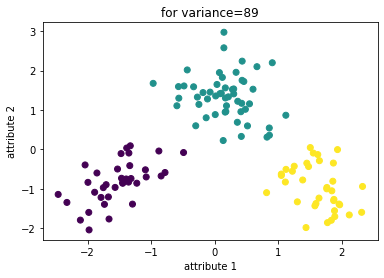





For variance_percentage= 84 %
The most impactful features indices:
[[12  2  9  0  1 11  8  4  5 10  7  3  6]
 [ 6 12 11  0 10  2  7  4  1  8  5  3  9]]
The top 5 most impactful features are: ['Proline ', 'Ash', 'Color intensity', 'Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines', 'Proanthocyanins', 'Magnesium', 'Total phenols', 'Hue', 'Nonflavanoid phenols', 'Alcalinity of ash', 'Flavanoids'] 



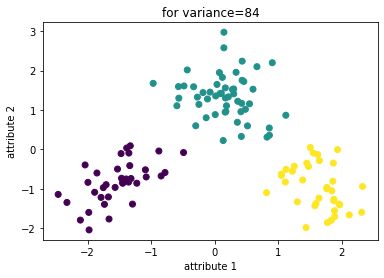





For variance_percentage= 79 %
The most impactful features indices:
[[12  2  9  0  1 11  8  4  5 10  7  3  6]
 [ 6 12 11  0 10  2  7  4  1  8  5  3  9]]
The top 5 most impactful features are: ['Proline ', 'Ash', 'Color intensity', 'Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines', 'Proanthocyanins', 'Magnesium', 'Total phenols', 'Hue', 'Nonflavanoid phenols', 'Alcalinity of ash', 'Flavanoids'] 



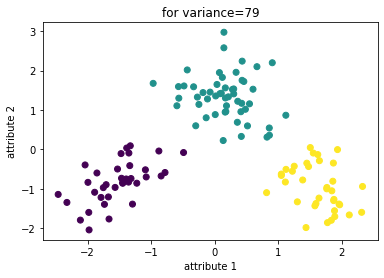

In [359]:
def plotting(df,y,titl):
  df=np.array(df)
  plt.scatter(df[:,0],df[:,1],c=y)
  plt.title(titl)
  plt.xlabel("attribute 1")
  plt.ylabel("attribute 2")
  plt.show()

for i in range(99,75,-5):
  lda_model=LDA_scratch(x_train,y_train,i)
  transformed_x=lda_model.transform(x_train)
  lin_dis=lda_model.lin_dis
  high_impact_features=np.argsort(lin_dis)[::-1]
  print("For variance_percentage=",i,"%")
  print("The most impactful features indices:")
  print(high_impact_features)
  print("The top 5 most impactful features are:",[df.columns[i] for i in high_impact_features[0]],"\n")
  plotting(transformed_x,y_train,f"for variance={i}")
  print("\n")
  print("\n")


## **Part 3**
Perform PCA on the dataset and compare the results with LDA by using any 2
classification techniques.

### PCA

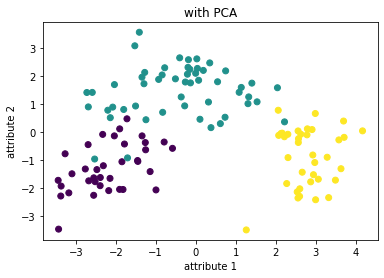

In [360]:
PCA_model=PCA_scratch(x_train,4)
x_train_transformed_pca=PCA_model.fit_transform()
plotting(x_train_transformed_pca,y_train,"with PCA")

### LDA

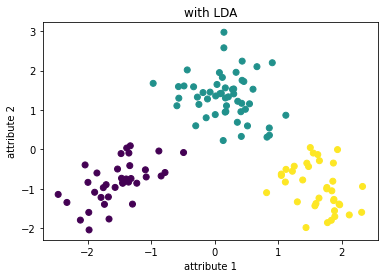

In [361]:
LDA_model=LDA_scratch(x_train,y_train,99)
x_train_transformed_lda=LDA_model.transform(x_train)
plotting(x_train_transformed_lda,y_train,"with LDA")

### CLASSIFICATION TECHNIQUES:

In [362]:
# pca
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train_transformed_pca,y_train)
KNN_model_predicted_pca=KNN_model.predict(x_train_transformed_pca)
print("f1 score after PCA of KNN_model:",f1_score(y_train,KNN_model_predicted_pca,average='weighted'))
print("accuracy_score score after PCA of KNN_model:",accuracy_score(y_train,KNN_model_predicted_pca))
print("recall_score after PCA of KNN_model:",recall_score(y_train,KNN_model_predicted_pca,average='weighted'))

f1 score after PCA of KNN_model: 0.9594622382781447
accuracy_score score after PCA of KNN_model: 0.9596774193548387
recall_score after PCA of KNN_model: 0.9596774193548387


In [363]:
# lda
KNN_model=KNeighborsClassifier()
KNN_model.fit(abs(x_train_transformed_lda),y_train)
KNN_model_predicted_lda=KNN_model.predict(abs(x_train_transformed_lda))
print("f1 score after LDA of KNN_model:",f1_score(y_train,KNN_model_predicted_lda,average='weighted'))
print("accuracy_score score after LDA of KNN_model:",accuracy_score(y_train,KNN_model_predicted_lda))
print("recall_score after LDA of KNN_model:",recall_score(y_train,KNN_model_predicted_lda,average='weighted'))

f1 score after LDA of KNN_model: 0.7758452670003138
accuracy_score score after LDA of KNN_model: 0.782258064516129
recall_score after LDA of KNN_model: 0.782258064516129


In [364]:
# pca
DecisionTree_model=DecisionTreeClassifier()
DecisionTree_model.fit(x_train_transformed_pca,y_train)
DecisionTree_model_predicted_pca=DecisionTree_model.predict(x_train_transformed_pca)
print("f1 score after PCA of DecisionTree_model:",f1_score(y_train,DecisionTree_model_predicted_pca,average='weighted'))
print("accuracy_score score after PCA of DecisionTree_model:",accuracy_score(y_train,DecisionTree_model_predicted_pca))
print("recall_score after PCA of DecisionTree_model:",recall_score(y_train,DecisionTree_model_predicted_pca,average='weighted'))

f1 score after PCA of DecisionTree_model: 1.0
accuracy_score score after PCA of DecisionTree_model: 1.0
recall_score after PCA of DecisionTree_model: 1.0


In [365]:
# lda
DecisionTree_model=DecisionTreeClassifier()
DecisionTree_model.fit(abs(x_train_transformed_lda),y_train)
DecisionTree_model_predicted_lda=DecisionTree_model.predict(abs(x_train_transformed_lda))
print("f1 score after LDA of DecisionTree_model:",f1_score(y_train,DecisionTree_model_predicted_lda,average='weighted'))
print("accuracy_score score after LDA of DecisionTree_model:",accuracy_score(y_train,DecisionTree_model_predicted_lda))
print("recall_score after LDA of DecisionTree_model:",recall_score(y_train,DecisionTree_model_predicted_lda,average='weighted'))

f1 score after LDA of DecisionTree_model: 1.0
accuracy_score score after LDA of DecisionTree_model: 1.0
recall_score after LDA of DecisionTree_model: 1.0


## **Part 4**
Create a table to properly note down the accuracies in case of each classifier and the corresponding reduction technique. Show using scatter plot of any two features among the features you chose which contribute to the maximum variance the decision boundary in case of LDA.

In [366]:
def decision_boundary(x,y,clf,title_):
  x_min, x_max = x.iloc[:, 0].min() - 0.1, x.iloc[:, 0].max() + 0.1
  y_min, y_max = x.iloc[:, 1].min() - 0.1, x.iloc[:, 1].max() + 0.1
  xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.01),
                                np.arange(y_min, y_max, 0.01))
  #print(xx_train, yy_train)
  Z_train = clf.predict(np.c_[(xx_train).ravel(), (yy_train).ravel()])

  Z_train = Z_train.reshape(xx_train.shape)
  plt.contourf(xx_train, yy_train, Z_train)
  #print(Counter(y))
  plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = y, edgecolor = 'k')
  plt.xlabel('attribute 1')
  plt.ylabel('attribute 2')
  plt.title(title_)
  plt.show()

In [367]:
lda=LDA_scratch(x_train,y_train,99.5)
x_train_trans=lda.transform(x_train)

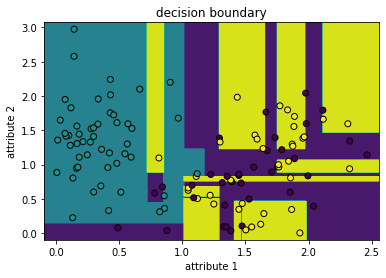

In [368]:
DecisionTree_model=DecisionTreeClassifier()
DecisionTree_model.fit(abs(x_train_trans),y_train)
decision_boundary(abs(x_train_trans.iloc[:,:2]),y_train,DecisionTree_model,"decision boundary")

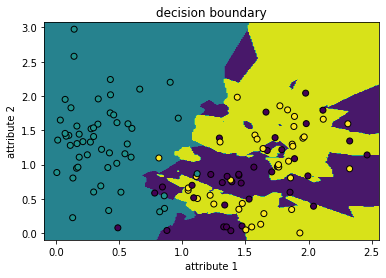

In [369]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(abs(x_train_trans),y_train)
decision_boundary(abs(x_train_trans),y_train,KNN_model,"decision boundary")

## **Part 5**
Using LDA as a classifier, perform 5-fold cross-validation and plot ROC and compute AUC for each fold from scratch

In [370]:
dataset=x.copy()
dataset['class']=y
dataset

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,3
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,3
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,3
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,3


In [371]:
new_dataset=dataset[dataset['class']!=3]
new_dataset

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-1.149560,-0.158301,-0.718336,0.451946,-1.035055,0.488531,0.623193,0.065639,-0.422075,-0.994085,-0.427544,0.943956,-1.174738,2
126,-0.704864,-0.723829,-0.279695,0.602088,-0.964842,0.712858,1.125176,0.226796,0.313800,-0.483652,-1.173391,0.322481,-1.257535,2
127,-1.495434,-0.185231,1.511422,2.704083,-0.543562,-0.264565,0.211566,1.757779,0.296279,-0.890268,0.055064,-0.242496,-0.894503,2
128,-0.778980,-0.634063,-0.243142,1.502943,-0.824415,-0.120355,0.422399,0.307374,0.541571,-1.270929,-0.295924,0.237735,-1.289380,2


In [372]:
from random import sample
def split_list(l):
  x=len(l)//5
  split_list=[l[:x]]
  split_list.append(l[x:2*x])
  split_list.append(l[2*x:3*x])
  split_list.append(l[3*x:4*x])
  split_list.append(l[4*x:])
  return split_list


def plot_roc(tpr,fpr,title_):
  plt.subplots(1, figsize=(10,10))
  plt.title(title_)
  plt.plot(fpr, tpr)
  #plt.plot([0, 1], ls="--")
  #plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
def cross_val_5fold(df):
  n=len(df)
  rand_l=sample(range(n),n)
  split_l=split_list(rand_l)
  index_train=[]
  index_test=[]
  for i in range(0,5):
    for j in range(0,5):
      if(j!=i):
        index_train+=split_l[j]
      else:
        index_test=split_l[j]
    df_train=df.iloc[index_train,:]
    df_test=df.iloc[index_test,:]
    lda_model=LDA_scratch(df_train.iloc[:,:-1],df_train.iloc[:,-1],100)
    cross_val_score=lda_model.cross_val_score(df_test.iloc[:,:-1],df_test.iloc[:,-1])
    tpr,fpr=lda_model.roc_val(df_test.iloc[:,:-1],df_test.iloc[:,-1])
    plot_roc(tpr,fpr,f'Receiver Operating Characteristic for fold - {i}')
    print("cross_val_score for fold",i+1,"is: ",cross_val_score)
    print("AUC_score for fold",i+1,"is: ",np.trapz(tpr,fpr))
    print('\n','\n')



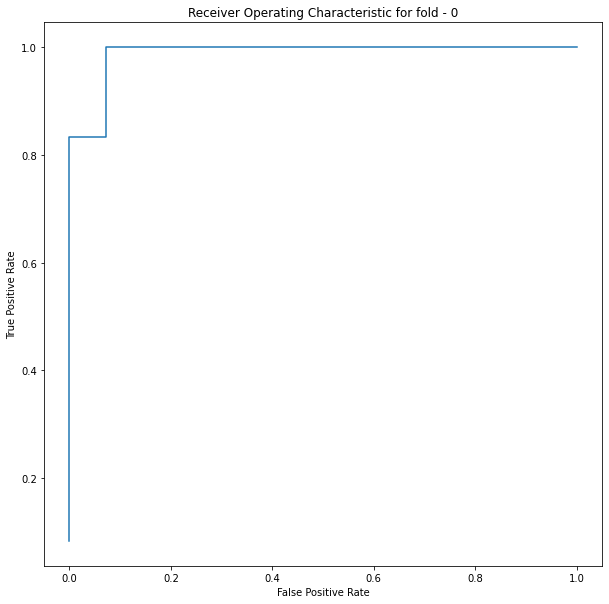

cross_val_score for fold 1 is:  0.8461538461538461
AUC_score for fold 1 is:  0.9880952380952381

 



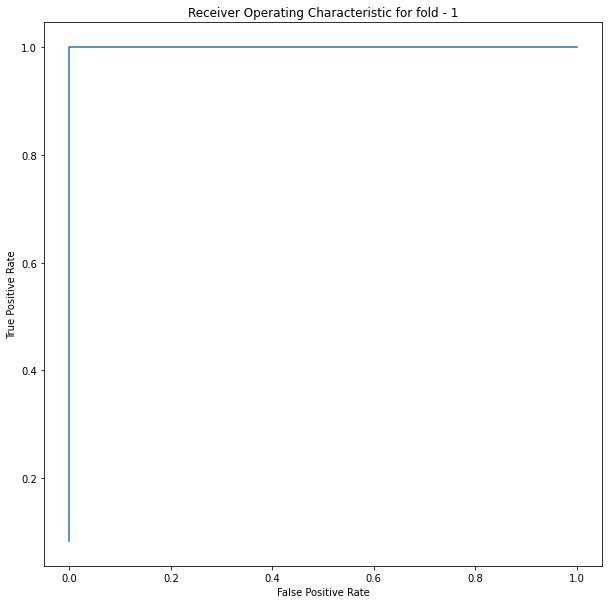

cross_val_score for fold 2 is:  0.8846153846153846
AUC_score for fold 2 is:  1.0

 



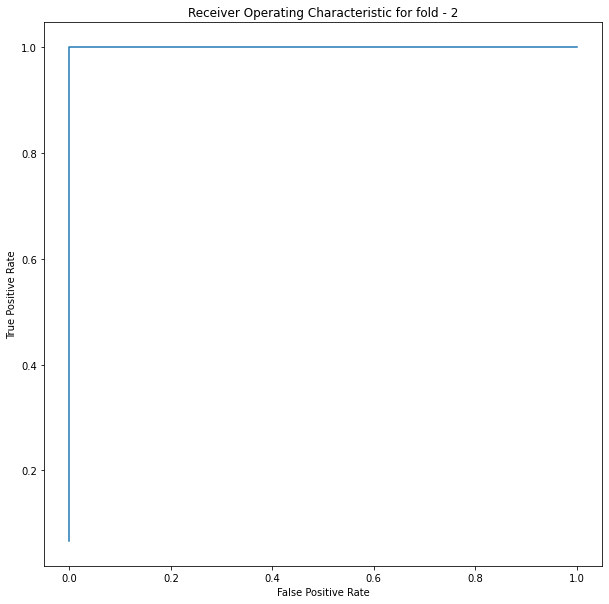

cross_val_score for fold 3 is:  1.0
AUC_score for fold 3 is:  1.0

 



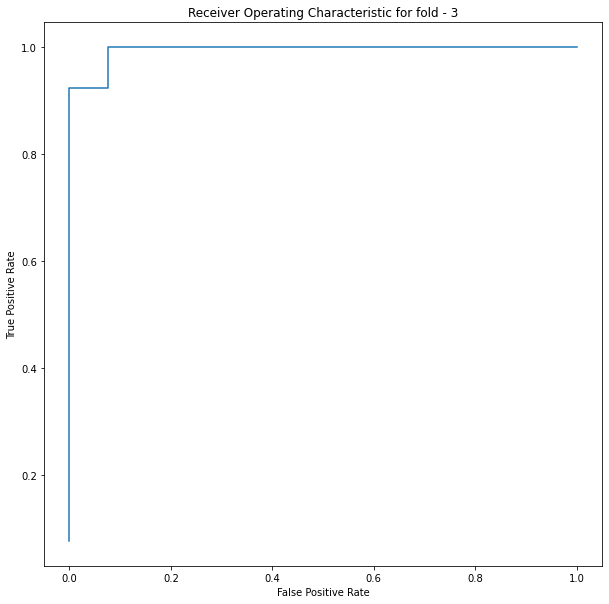

cross_val_score for fold 4 is:  0.9615384615384616
AUC_score for fold 4 is:  0.9940828402366865

 



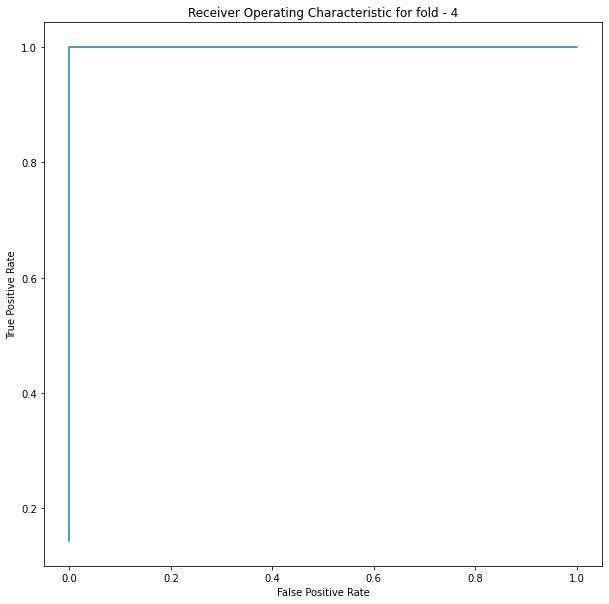

cross_val_score for fold 5 is:  0.9615384615384616
AUC_score for fold 5 is:  1.0

 



In [373]:
cross_val_5fold(new_dataset)